# <div align="center"><b> СБОРНЫЙ ПРОЕКТ №1 </b></div> 

**Цель проекта**: выявление параметров, влияющих на уровнь продаж игровых продуктов, для планирования рекламных кампаний магазина "Стримчик" на будущий (2017) год;

**Задачи**:
- рассчитать суммарный объем продаж во всех регионах;
- провести анализ изменения объемов выпускаемых игр в течение 1980-2016 гг;
- провести анализ распределения объемов продаж по платформам;
- провести анализ с целью определения характерного времени существования платформ и периода появления новых;
- определить период, актуальный для прогнозирования предпочтений на рынке игр в 2017 г.;
- выбрать потенциально прибыльные платформы на 2017 г;
- провести анализ влияния оценок пользователей и критиков на уровень продаж;
- провести анализ популярности различных жанров за актуальный период;
- для каждого региона составить рейтинги ТОП-5 жанров, ТОП-5 платформ. Выявить особенности в портретах пользователей каждого региона;
- выполнить анализ влияния рейтинга ESRB на объемы продаж по регионам;
- выполнить проверку гипотез о равенстве средних пользовательских рейтингов платформ XOne и PC; о равенстве средних пользовательских рейтингов жанров Action и Sport.

**Исходные данные**: исторические данные о продажах игр, оценках пользователей и экспертов, соответствующих жанрах и платформах выпуска за 27 лет - с 1980 по 2016 включительно. Данные взяты из открытых источников.

# 1. Предобработка данных

С целью получения корректных результатов исследования на этапе предобработки данных должно быть выполнено следующее:
- получение общей информации о данных, выявление возможных проблем;
- поиск и устранение аномальных значений (при необходимости);
- поиск и устранение пропусков (при необходимости);
- поиск и устранение явных и неявных дубликатов;
- корректировка типов данных (при необходимости).

## 1.1 Обзор данных <a id = 'info'></a>

In [1]:
#импорт библиотек
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy import stats as st
import matplotlib.ticker as ticker
import seaborn as sns

In [2]:
#снимем ограничение на количество столбцов датафрейма, выводимых на экран
pd.options.display.max_columns = None

In [3]:
#прочитаем файл со статистикой игровых продуктов и сохраним его в переменную df
try:
    # local machine
    df = pd.read_csv(r'C:\Users\vizum\Desktop\yandex_practicum\project_final_first\dataset\games.csv')
except:
    #yandex practicum server
    df = pd.read_csv('/datasets/games.csv')
    
#выведем на экран первые 5 строк датафрейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#выведем на экран последние 5 строк датафрейма
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [5]:
#получим общую информацию о наборе данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Выводы:**
- датасет со статистикой продаж игровых продуктов интернет-магазина "Стримчик" содержит 16715 строк и 11 столбцов;
- пропуски наблюдаются в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating`. Вероятно, пропуски в столбцах `Name`, `Year_of_Release`, `Genre` возникли вследствие каких-либо технических факторов: сбой при формировании датафрейма, возникновение ошибок при выгрузке данных и т.д. Пропуски в столбцах `Critic_Score`, `User_Score`, `Rating` связаны, скорее всего, с отсутствием оценок пользователей/критиков и какой-либо возрастной категории, однако могла произойти и системная ошибка;
- обнаружено несоответствие формата данных в столбцах `Year_of_Release` (должен быть тип integer), `User_Score` (должен быть тип float);
- скорее всего данные в столбце `Critic_Score` должны иметь тип integer. Требуется дополнительная проверка;
- в названих столбцов нарушен стиль snake_case - присутствуют прописные символы.

Для дальнейшей работы с датасетом требуется:
- привести названия столбцов к стилю snake_case;
- обработать пропуски;
- исправить тип данных в столбцах `Year_of_Release`, `User_Score`, `Critic_Score`;
- выполнить поиск аномальных значений;
- проверить датасет на наличие явных и неявных дубликатов.

## 1.2 Исправление ошибок в названии столбцов датафрейма

На этапе [обзора данных](#info) было выявлено, что в названиях столбцов нарушен стиль snake-case: в названиях присутствуют прописные буквы. Приведем все заголовки к нижнему регистру:

In [6]:
df.columns=df.columns.str.lower()

#проверим результат
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

Все заголовки приведены к нижнему регистру.

## 1.3 Заполнение пропусков

Рассчитаем процент и количество пропусков в датафрейме:

In [7]:
pd.DataFrame((round(df.isna().mean()*100, 2))).\
join(pd.DataFrame((round(df.isna().sum(), 0))), lsuffix='_percent', rsuffix='_count')

,0_percent,0_count
name,0.01,2
platform,0.00,0
year_of_release,1.61,269
genre,0.01,2
na_sales,0.00,0
eu_sales,0.00,0
jp_sales,0.00,0
other_sales,0.00,0
critic_score,51.32,8578
user_score,40.09,6701


- в столбцах с именем и жанром всего по два пропуска - по 0.01% от всех значений в столбце. Возможно, что пропуски в этих столбцах приходятся на одни и те же строки (проверим далее). В любом случае строки с пропусками в этих столбцах можно без последствий удалить, так как они занимают слишком маленький объем выборки;
- в столбце `year_of_release` менее 2% пропусков. Их тоже можно удалить;
- в столбце `critic_score` 51% пропущенных значений, в столбце `user_score` - 40% пропусков. Так как пропуски в столбцах `critic_score` и `user_score` подразумевают отсутствие оценки и , как правило, минимальное значение оценки 1 - средняя оценка не может быть меньше 1, заполним пропуски нулями;
- в столбце `rating` 40% пропусков. Так как в этом столбце содержатся категориальные данные, заполнение медианой, средним или нулем не подойдет. На первый взгляд можно заполнить пропуски следующим образом: если игра выходила несколько раз в разные годы и хотя бы для одного релиза известна возрастная категория, то это значение можно присвоить другим релизам этой же игры. Однако если в разные годы выпуска или для разных платформ игра может иметь различный рейтинг ESRB, то таким образом заполнять нельзя. Проверим, сохраняется ли одна и та же возрастная категория для одной и той же игры в разные годы выпуска и для разных платформ, если нет - заполним пропуски значением "unknown".

In [8]:
#выведем на экран строки, в которых есть пропуск хотя бы в одном из столбцов `name` и `genre`
df[(df['name'].isna())&(df['genre'].isna())]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Действительно, у нас есть две неизвестные игры неизвестного жанра с неизвестными рейтингами, но на платформе GEN, выпущенные в 1993 году. Удалим эти строки:

In [9]:
df=df.dropna(subset=['name']).reset_index(drop=True)

#проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [10]:
#удалим строки с пропусками в 'year_of_release'
df=df.dropna(subset=['year_of_release']).reset_index(drop=True)

#проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Из датафрейма удалена 271 строка, что составляет 1.6% первоначального объема данных.
Заполним нулями пропуски в `critic_score` и `user_score`.

In [11]:
#заполним нулями пропуски в critic_score и user_score
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)

#проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Замена пропусков в `critic_score` и `user_score` выполнена.

Проверим, сохраняется ли для одной и той же игры в разные годы выпуска и на разных платформах возрастная категория ESRB:

In [12]:
#напишем функцию, определяющую количество разных оценок ESRB для одного наименования игры
def rating_count(row):
    row['count'] = len(row['rating'])
    return row

In [13]:
#рассчитаем количество разных оценок ESRB для одного наименования игры

#сгруппируем датафрейм по имени, каждому имени игры сопоставим список с уникальными оценками ESRB
#применив функцию rating_count рассчитаем количество уникальных оценок ESRB для каждой игры
#выведем на экран 10 игр с наибольшим количеством оценок ESRB
df[~df['rating'].isna()].groupby(by='name')['rating'].unique().reset_index()\
.apply(rating_count, axis=1).sort_values(by='count', ascending = False).head(10)

,name,rating,count
1078,Dawn of Discovery,"[T, E10+, E]",3
4440,Shaun White Snowboarding,"[T, E10+, E]",3
1171,DiRT 2,"[T, E10+, E]",3
1983,Ghostbusters: The Video Game,"[E10+, T, E]",3
5244,The Sims 2: Castaway,"[T, E10+, E]",3
5887,X-Men: Destiny,"[T, E10+]",2
5886,X-Men Origins: Wolverine,"[T, E10+]",2
2178,Harry Potter and the Order of the Phoenix,"[E, E10+]",2
2177,Harry Potter and the Half-Blood Prince,"[E10+, E]",2
2176,Harry Potter and the Goblet of Fire,"[E10+, E]",2


Для некоторых игр в датафрейме присутствует несколько оценок ESRB, при этом оценки довольно близки друг к другу. По данным [википедии](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board):
- возрастная категория E (everyone) предназначена для детей от 6 лет, появилась в 1996 г.;
- возрастная категория Е+ (everyone 10 and older) предназначена для детей от 10 лет и старше, появилась в 2005 году;
- возрастная категория Т (teen) предназначена для лиц от 13 лет, принята в 1994 г. Интересно также, что с 1998 г. со знака категории Т [убрали](https://dtf.ru/games/754729-na-strazhe-detstva-esrb-pegi-i-drugie) обозначение "ages 13+", что неофициально расширило возрастной диапазон категории.

Рассмотрим для примера информацию о игре "Dawn of Discovery".

In [14]:
df[df['name']=='Dawn of Discovery']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
4956,Dawn of Discovery,PC,2009.0,Simulation,0.00,0.32,0.0,0.06,82.0,8.8,T
7686,Dawn of Discovery,Wii,2009.0,Simulation,0.12,0.06,0.0,0.02,81.0,8.5,E10+
10180,Dawn of Discovery,DS,2009.0,Simulation,0.07,0.03,0.0,0.01,82.0,7.3,E


Так, для игры "Dawn of Discovery" наблюдается три разных рейтинга на трех разных платформах в один год выпуска.

Суммируя все вышесказанное, можно сказать, что возрастная категория ESRB не является постоянной для одной и той же игры - и для разных голов выпуска (например, вследствие изменения шкалы рейтинга ESRB), а также для разных игровых платформ может различаться. Исходя из этого, заполним пропуски в столбце `rating` значением "unknown".

In [15]:
df['rating'] = df['rating'].fillna('unknown')

#проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,unknown
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...
16439,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,0.0,0,unknown
16440,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,0.0,0,unknown
16441,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,0.0,0,unknown
16442,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,0.0,0,unknown


Все пропуски в столбце `raiting` заполнены.

# 1.3 Изменение типов данных

Исходя из анализа [общей информации](#info):
- тип данных столбца `year_of_release` необходимо заменить на integer;
- необходимо проверить столбец `critic_score` на наличие дробных значений, при их отсутствии изменить тип данных на integer;
- данные столбца `user_score` необходимо изменить на float;

In [17]:
#заменим тип данных в year_of_release на integer
df['year_of_release'] = df['year_of_release'].astype('int')

#проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB


In [18]:
#проверим столбец critic_score на наличие дробных значений и при их отсутствии приведем к формату integer
try:
    df['critic_score']=df['critic_score'].astype('int')
    
    #проверим результат
    df.info()
except:
    print('Есть дробные значения!')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  object 
 10  rating           16444 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.4+ MB


Тип данных столбца `user_score` object указывает на то, что в столбце имеются текстовые значения. Проверим:

In [19]:
df['user_score'].unique()

array(['8', 0, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Действительно, помимо числовых пользовательских оценок, столбец содержит знаение "tbd". Вероятно, это распространенная среди геймеров аббревиатура от "to be determinted" или "to be done", что означает "будет определено/сделано" ([источник](https://fb.ru/article/171345/tbd---chto-znachit-eto-sokraschenie)). Таким образом, "tbd" фактически означает пропуск - отсутствие информации. Заменим значения "tbd" на нули.

In [20]:
df.loc[df['user_score']=='tbd', 'user_score'] = 0

#проверим результат
print('Значений tbd:', df[df['user_score']=='tbd']['user_score'].count())

Значений tbd: 0


In [21]:
#выполним изменение типа данных столбца `user_score`
df['user_score'] = df['user_score'].astype('float')

#проверим результат
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  int64  
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.4+ MB


Все замены типов данных выполнены.

# 1.4 Поиск аномальных значений

Для поиска аномальных значений в числовых данных воспользуемся методом describe(). Благодаря полученной статистической информации, можно будет сделать вывод о том, все ли числовые данные находятся в пределах допустимых значений. 

Для поиска аномальных значений в текстовых данных (название игры, платформа и жанр) воспользуемся методом unique(), что также позволит уже на этом этапе обнаружить неявные дубликаты (если они имеются).

In [22]:
df.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,33.494405,3.234237
std,5.875525,0.818378,0.506716,0.311100,0.188005,35.821558,3.689043
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.000000,0.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


Среди информации о годе выпуска, объемах продаж и оценках критиков и пользователей аномальных данных не обнаружено. 

In [23]:
#определим количество уникальных наименований в названиях игр
len(df['name'].unique())

11426

Список уникальных имен слишком большой для ручного поиска неявных дубликатов и аномальных значений. Так как в дальнейшем столбец `name` не нужен, примем, что аномальных значений нет (на самом деле же игра может иметь любое название), неявных дубликатов нет.

In [24]:
#определим список уникальных жанров
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Среди жанров нет ни неявных дубликатов, ни аномальных значений.

In [25]:
#определим уникальные значения столбца с наименованием игровых платформ
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Среди названий игровых платформ нет ни неявных дубликатов, ни аномальных значений.

In [26]:
#определим уникальные значения столбца rating
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', 'unknown'],
      dtype=object)

Неявных дубликатов и аномальных значений в столбце с возрастной категорией нет. Все категории входят или входили ранее в шкалу ESRB.

## 1.5 Поиск дубликатов

Поиск неявных дубликатов был выполнен на предыдущем этапе совместно с поиском аномальных значений. Проверим датафрейм на наличие полных дубликатов:

In [27]:
df.duplicated().sum()

0

Полные дубликаты отсутствуют. Дополнительно проверим датафрейм на наличие полных дубликатов, исключив столбец `name` - так мы косвенно проверим наличие неявных дубликатов в названиях игр (что вручную не сделать - выявлено в разделе 1.4), а также исключим влияние возможного наличия неявных дубликатов в названиях игр на результат определения полных дубликатов.

In [28]:
df.loc[:,['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating']].duplicated().sum()

0

Полные дубликаты отсутствуют, неявные дубликаты в столбце `name` не были найдены.

In [29]:
df.loc[:,['name', 'platform', 'year_of_release']].duplicated().sum()

1

По имени, платформе и году релиза найден один дубликат. Посмотрим на него:

In [30]:
df[df.loc[:,['name', 'platform', 'year_of_release']].duplicated()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
15969,Madden NFL 13,PS3,2012,Sports,0.0,0.01,0.0,0.0,83,5.5,E


Посмотрим на обе строки-дубликаты:

In [31]:
df[(df['name']=='Madden NFL 13')&(df['platform']=='PS3')&(df['year_of_release']==2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


Просуммируем значения продаж в Европе, сохраним результат в строке с индексом 600, удалим дубликат в строке 15969.

In [32]:
#просуммируем значения продаж в Европе
df.loc[600, 'eu_sales'] = df.loc[600, 'eu_sales']+df.loc[15969, 'eu_sales']

#проверим результат
df[(df['name']=='Madden NFL 13')&(df['platform']=='PS3')&(df['year_of_release']==2012)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
600,Madden NFL 13,PS3,2012,Sports,2.11,0.23,0.0,0.23,83,5.5,E
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83,5.5,E


In [33]:
print('Строк до удаления дубликата', df.shape[0])

Строк до удаления дубликата 16444


In [34]:
#удалим строку с индексом 15969
df=df.drop(index=15969).reset_index(drop=True)

#снова посчитаем дубликаты по году, платформе и наименованию игры
df.loc[:,['name', 'platform', 'year_of_release']].duplicated().sum()

0

In [35]:
print('Строк после удаления дубликата', df.shape[0])

Строк после удаления дубликата 16443


Удален один неявный дубликат.

## 1.6 Расчет суммарного объема продаж со всех регионов

Рассчитаем суммарный объем продаж во всех регионах для каждой позиции датафрейма.

In [36]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

#проверим результат
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0,0.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0,0.0,unknown,31.38


Суммарный объем продаж для каждой позиции рассчитан корректно.

# 2. Исследовательский анализ данных

## 2.1 Анализ объемов выпускаемых игр по годам

Проанализируем объемы выпускаемых игр по годам. Рассмотрим как общее количество выпущенных игр в год, так и количество уникальных наименований игр в год (одна игра выпущенная на разных платформах учитывается как одна).

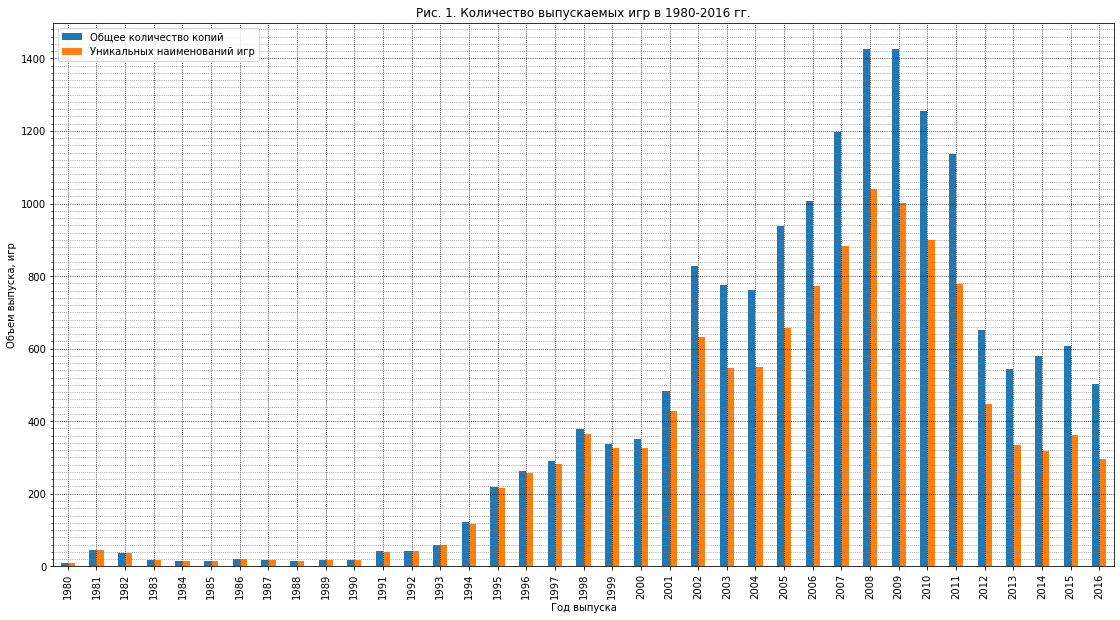

In [37]:
#cоздадим полотно графика, зададим размер
fig, ax = plt.subplots(figsize=(19, 10))

#1.посчитаем общее количество копий в год
#2.посчитаем количество уникальных игр, выпускаемых в год и объединим полученные данные с таблицей, полученной в предыдущем шаге
#3.построим столбчатую диаграмму для общего количества копий в год и количества уникальных игр в год
df.groupby(by='year_of_release')['name'].count().reset_index()\
.merge(df.groupby(by='year_of_release')['name'].nunique().reset_index(), on='year_of_release', how='outer', suffixes=('_all_releases', '_unique_games'))\
.plot(kind='bar', x='year_of_release', y=['name_all_releases', 'name_unique_games'], ax=ax)

#настроим параметры осей
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(20))

#включим и настроим параметры координатной сетки
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'gray', linestyle = ':')

#добавим элемента оформления диаграммы
plt.title('Рис. 1. Количество выпускаемых игр в 1980-2016 гг.');
plt.xlabel('Год выпуска');
plt.ylabel('Объем выпуска, игр');
plt.legend(['Общее количество копий', 'Уникальных наименований игр'], loc=2);

Анализируя полученную диаграмму, можно сделать следующие **выводы**: <a id='volume_analysis'></a>
- количество выпускаемых игр (общее количество релизов) в 1980-1990 годах в целом находится в пределах менее 20 копий в год (за исключением локального пика в 1981-1982 гг - 46 и 36 копий соответственно). С 1991 г. по 2008 г. наблюдается устойчивый рост общего объема выпуска, достигающего в 2008 г. отметки в 1427 игр. После 2008 до 2012 г. происходит резкое снижение объемов выпуска до 653 копий (в 2.1 раз), затем показатели общего объема выпускаемых игр выходят на относительно ровное плато: в 2013-2016 годах количество копий варьируется в пределах от 502 до 606 релизов в год;
- характер изменения объема выпуска уникальных наименований аналогичен изменению общего количества выпускаемых копий. Количество уникальных игр в год также практически постоянно в 1980-1990 годах (за исключением локального пика в  1981-1982 гг - 46 и 36 игр соответственно), с 1991 по 2008 год увеличивается с отметки 40 до 1039 наименований, затем к 2012 году снижается до 446 наименований (в 2.3 раза), возвращаясь к показателям 1998-2000 гг., после чего выходит на относительное плато: с 2013 по 2016 гг. количество уникальных наименований игр находится в пределах от 297 до 362 наименований в год;
- начиная с 1991 года общее количество выпускаемых в год копий начинает превышать количество уникальных наименований игр, что связано с началом выпуска игр на нескольких игровых платформах. При этом, если с 1991 по 2001 год включительно разница между общим количеством копий и количеством уникальных наименований не превышает 54 копий, то в 2002 г. разница резко увеличивается до 198 копий, затем продолжает расти, и к 2009 году разница достигает 422 копий. В 2012-2016 гг разница между общим количеством копий и количеством уникальных наименований игр снижается и находится в пределах от 205 до 262 копий в год. Подобное соотношение общего количества выпускаемых в год копий и количества уникальных игр в год может быть обусловлено как общим разнообразием игровых платформ, так и количеством платформ, принятых в работу разработчиками игровых продуктов.
- опираясь на все вышесказанное, можно сказать, что для дальнейшего анализа следует использовать данные 2013-2016 гг, так как показатели объемов выпуска за эти годы относительно устоялись и предпосылок к резкому изменению объемов выпуска в 2017 г. не наблюдается.

## 2.2 Анализ объемов продаж по платформам. Определение характерного времени существования платформ

Проанализируем объемы продаж по платформам с помощью столбчатой диаграммы.

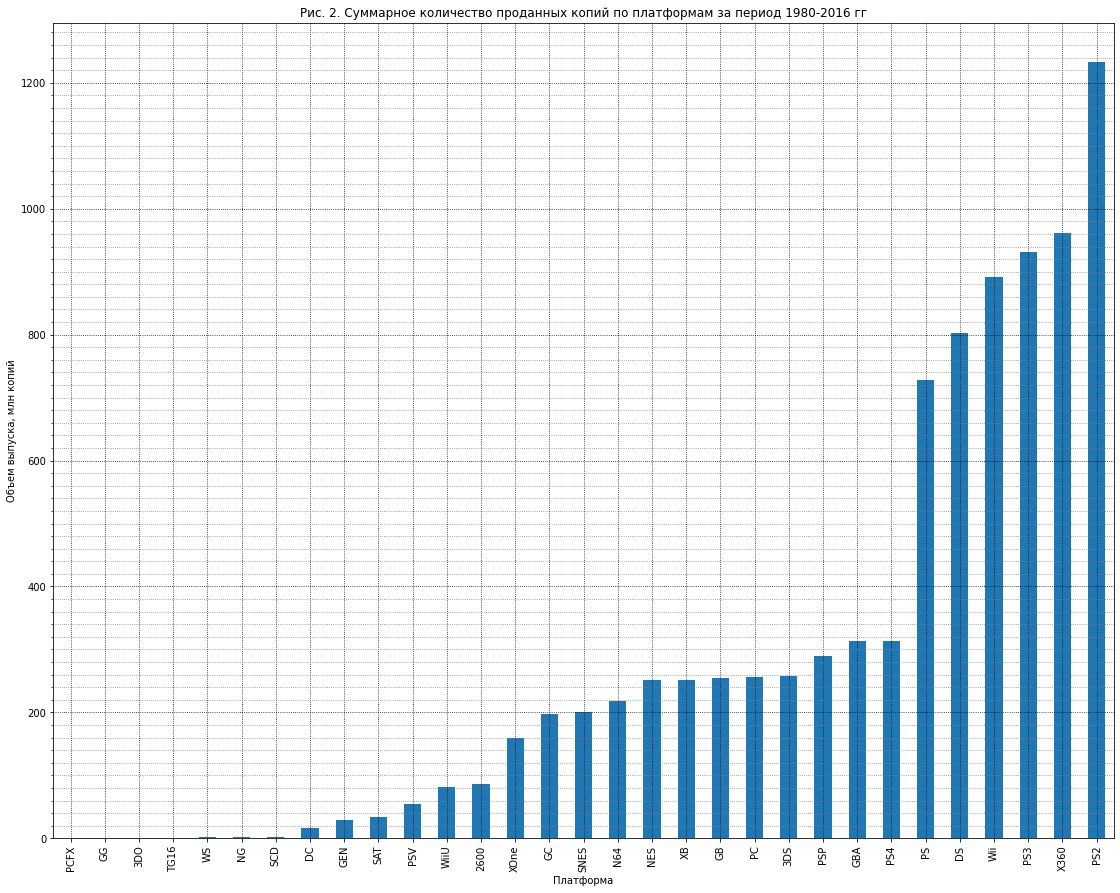

In [38]:
#cоздадим полотно графика, зададим размер
fig, ax = plt.subplots(figsize=(19, 15))

#построим диаграмму суммарного объема продаж по платформам
df.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales')\
. plot(kind='bar', legend=False, ax=ax)

#настроим параметры осей
ax.yaxis.set_major_locator(ticker.MultipleLocator(200))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(20))

#включим и настроим параметры координатной сетки
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'gray', linestyle = ':')

#добавим элемента оформления диаграммы
plt.title('Рис. 2. Суммарное количество проданных копий по платформам за период 1980-2016 гг');
plt.xlabel('Платформа');
plt.ylabel('Объем выпуска, млн копий');

Опираясь на рис. 2, можно выделить три группы платформ, различных по уровню продаж:
- платформы с наименьшим количеством продаж: PCFS, GG, 3DO, TG16, WS, NG, SCD, DC, GEN, SAT, PSV, WiiU, 2600;
- платформы со средним количеством продаж - минимальный объем продаж в этой группе в два раза превышает максимальный в предыдущей): XONE, GC, SNES, X64, NES, XB, PC, 3DS, PSP, GBA, PS4;
- платформы со максимальным количеством продаж - минимальный объем продаж в этой группе в два раза превышает максимальный в предыдущей):PS, DS, Wii, PS3, X360, PS2.

Однако в силу различного "возраста" платформ на рынке, судить о их потенциале на основании полученной диаграммы некорректно.

К платформам с наибольшими суммарными продажами можно отнести 6 платформ, объем продаж по которым минимум в два раз больше, чем у остальных: PS, DS, Wii, PS3, X360, PS2. Определим, сколько игр для каждой из этих платформ продавалось каждый год в период с 1980 по 2016 гг.

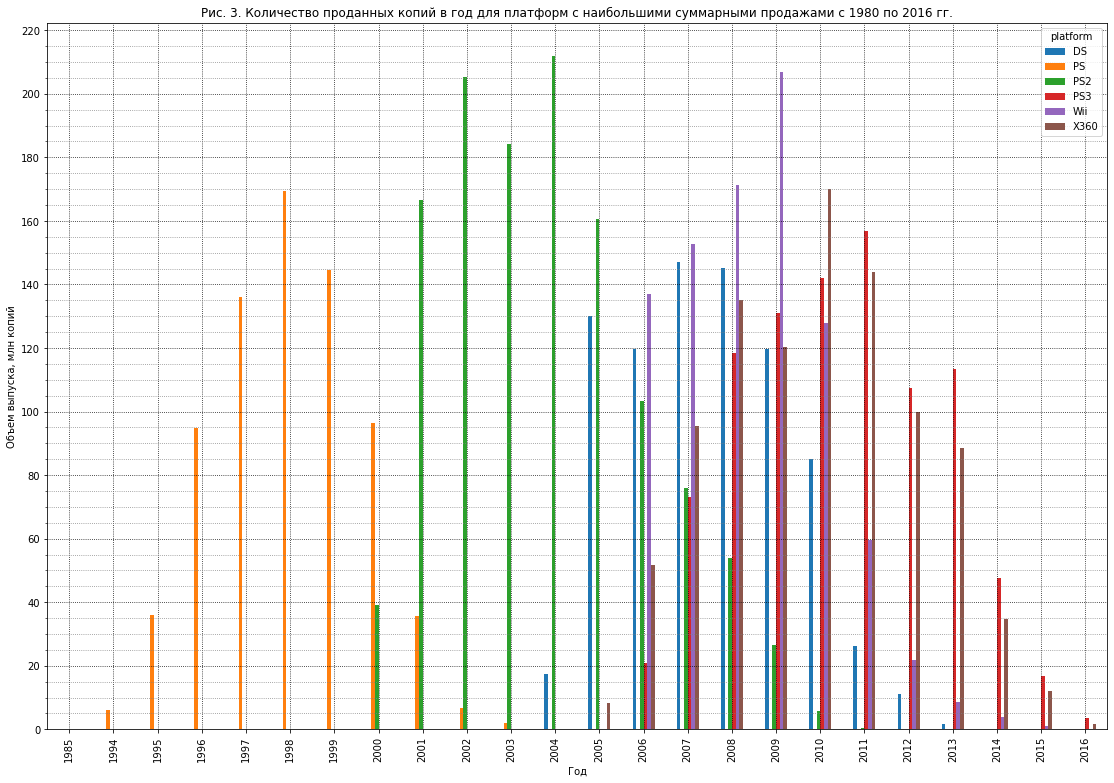

In [39]:
#cоздадим полотно графика, зададим размер
fig, ax = plt.subplots(figsize=(19, 13))

#рассчитаем количество продаж в год для 6 платформ с наибольшими суммарными продажами в 1980-2016 гг.
#построим столбчатую диаграмму
df[df['platform'].isin(['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'])].pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(kind='bar', ax=ax)

#настроим параметры осей
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

#включим и настроим параметры координатной сетки
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'gray', linestyle = ':')

#добавим элемента оформления диаграммы
plt.title('Рис. 3. Количество проданных копий в год для платформ с наибольшими суммарными продажами с 1980 по 2016 гг.');
plt.xlabel('Год')
plt.ylabel('Объем выпуска, млн копий');

Анализируя количество проданных копий в год для платформ с наибольшими суммарными продажами с 1980 по 2016 гг, можно сделать следующие выводы:
- "продолжительность жизни"- период, в течение которого происходят продажи для платформы -  для рассматриваемых платформ составляет 10-12 лет (следует отметить, что полученный срок определен визуально по количеству лет, для которых отображаются данные на диаграмме для каждой платформы. Однако так как из-за масштаба графика некоторые годы могут быть не учтены, в дальнейшем следует уточнить количество лет выпуска игр для каждой платформы);
- наибольшее количество продаж приходится на середину периода существования платформы;
- для платформ PS, PS3, X360 диаграммы практически симметричны относительно пика продаж, рост и спад продаж для каждой платормы происходят практически с одинаковой скоростью;
- для платформ DS, Wii, X360 резкий рост продаж наблюдается за 3-4 года до пикового значения, после чего скорость роста объемов уменьшается, и к середине периода существования платформы количество продаж достигает максимального значения, после чего, количество продаж плавно уменьшается;
- наибольшее количество продаж в пике наблюдается для платформ PS2, Wii (более 200 млн. копий), на следующем месте - платформы PS, X360 (около 170 млн. копий в пике), завершают - платформы DS и PS3 (≈145 и ≈155 млн. копий соответственно).

Продолжительность существования платформ с наибольшими продажами может отличаться от продолжительности существования остальных платформ. Определим для каждой платформы продолжительность периода и количество лет, когда выпускались игры для платформы:

In [40]:
#создадим сводную таблицу для платформ с информацией о самом раннем годе выпуска игр и о самом позднем
df_platform_life = df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()

#переименуем столбцы полученной сводной таблицы
df_platform_life.columns=['platform', 'first_year_of_release', 'last_year_of_release']

#рассчитаем продолжительность выхода игр для каждой платформы
df_platform_life['year_duration']=df_platform_life['last_year_of_release']-df_platform_life['first_year_of_release']+1

#рассчитаем количество лет выхода игр для каждой платформы
df_platform_life=df_platform_life.merge(df.groupby(by='platform')['year_of_release'].nunique().reset_index(), on='platform', how='outer')

#выведем результат на экран
df_platform_life.sort_values(by='year_duration')

,platform,first_year_of_release,last_year_of_release,year_duration,year_of_release
9,GG,1992,1992,1,1
14,PCFX,1996,1996,1,1
24,TG16,1995,1995,1,1
1,3DO,1994,1995,2,2
22,SCD,1993,1994,2,2
25,WS,1999,2001,3,3
12,NG,1993,1996,4,4
30,XOne,2013,2016,4,4
18,PS4,2013,2016,4,4
8,GEN,1990,1994,5,5


In [41]:
df_platform_life.sort_values(by='first_year_of_release')

,platform,first_year_of_release,last_year_of_release,year_duration,year_of_release
0,2600,1980,1989,10,10
11,NES,1983,1994,12,12
4,DS,1985,2013,29,11
13,PC,1985,2016,32,26
5,GB,1988,2001,14,13
23,SNES,1990,1999,10,10
8,GEN,1990,1994,5,5
9,GG,1992,1992,1,1
22,SCD,1993,1994,2,2
12,NG,1993,1996,4,4


Среди представленных платформ есть как платформы-однолетки, например, GG, PCFX, TG16, так и платформы, существующие долгое время, например - PC (32 года, с 1985 по 2016 год). При этом для платформ DC, GB, DS, PC игры выходили не каждый год.

Выведем на экран отдельно сроки существования топ-6 платформ по объемам продаж (PS, DS, Wii, PS3, X360, PS2):

In [42]:
df_platform_life[df_platform_life['platform'].isin(['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'])]

,platform,first_year_of_release,last_year_of_release,year_duration,year_of_release
4,DS,1985,2013,29,11
15,PS,1994,2003,10,10
16,PS2,2000,2011,12,12
17,PS3,2006,2016,11,11
26,Wii,2006,2016,11,11
28,X360,2005,2016,12,12


Действительно, не для всех платформ можно рассчитать годы выпуска игр по диаграмме на рис. 3. Так, игры на платформе DS выходили с 1985 по 2013 год - 29 лет, для остальных платформ из топ-6 действительно срок существования составляет от 10 до 12 лет.

Рассчитаем медианную продолжительность существования по всем платформам и по платформам PS, DS, Wii, PS3, X360, PS2, входящими в топ-6 платформ с наибольшим суммарным объемом продаж за 1980-2016 годы.

In [43]:
print('Медианная продолжительность существования платформы, лет:', df_platform_life['year_duration'].median())
print('Медианная продолжительность существования среди платформ с наибольшими продажами (PS, DS, Wii, PS3, X360, PS2), лет:',
     df_platform_life[df_platform_life['platform'].isin(['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2'])]['year_duration'].median())

Медианная продолжительность существования платформы, лет: 7.0
Медианная продолжительность существования среди платформ с наибольшими продажами (PS, DS, Wii, PS3, X360, PS2), лет: 11.5


Оценивать продолжительность существования платформ по всему датафрейму не совсем корректно, так как результат может исказить как наличие платформ-одногодок, так и наличие совсем молодых платформ. Для получения более точного результата необходимо использовать платформы, прошедшие период роста и спада продаж. Исходя из этого, за характерный период существования платформы примем 11.5 лет.

Для определения сроков выхода новых платформ и определения платформ, на которых игры продолжают выходить на момент планирования кампании (декабрь 2016) построим столбчатую диаграмму с годом первого релиза на платформе и последнего, зафиксированного на момент выгрузки выборки:

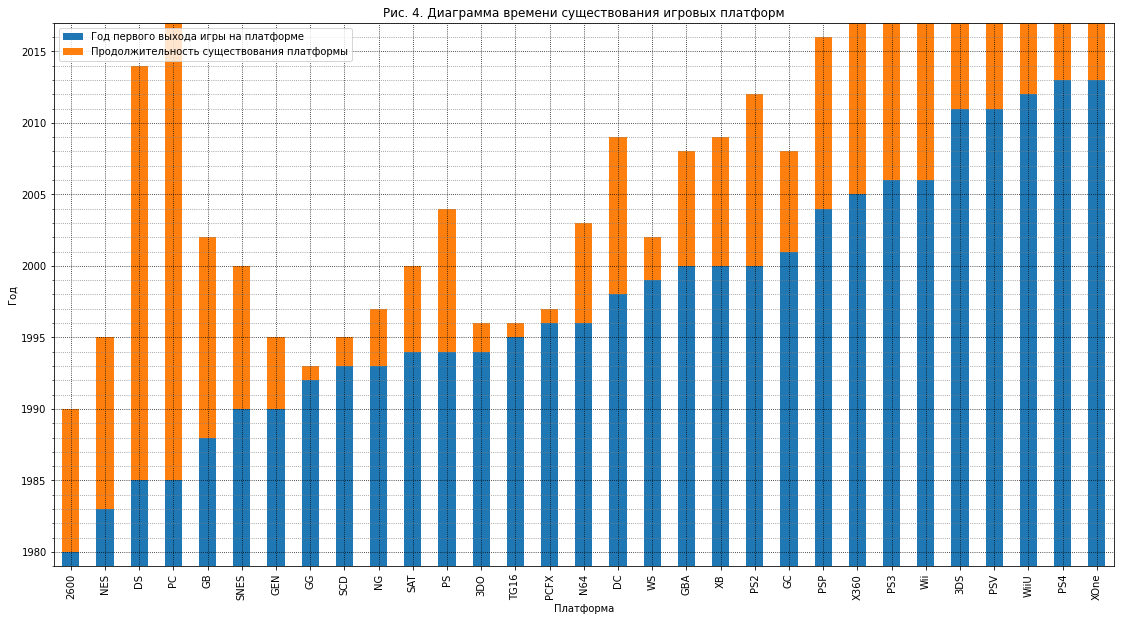

In [44]:
#cоздадим полотно графика, зададим размер
fig, ax = plt.subplots(figsize=(19, 10))

#построим столбчатую диаграмму для определения актуальных платформ
df_platform_life.sort_values(by='first_year_of_release').plot(kind='bar', x='platform', y=['first_year_of_release', 'year_duration'], stacked=True, ax=ax)

#зададим масштаб по оси Y
plt.ylim(1979, 2017)

#настроим параметры осей
ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))

#включим и настроим параметры координатной сетки
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'gray', linestyle = ':')

#добавим элемента оформления диаграммы
plt.title('Рис. 4. Диаграмма времени существования игровых платформ');
plt.xlabel('Платформа')
plt.ylabel('Год')
plt.legend(['Год первого выхода игры на платформе', 'Продолжительность существования платформы'], loc=2);

На момент планирования рекамной компании игровые продукты продолжают выпускаться на платформах XOne, PS4, WiiU, PSV, 3DS, Wii, X360, PC (последний релиз был в 2016 г.). Так как случаются годы "пропуска" игр, отнесем к актуальным также платформы X360 и DS (последний релиз в 2015 г.).

В период с 1980 по 1990 гг. в среднем выходило менее одной игры в год - 7 игр за 11 лет. Начиная с 1992 г. выход платформ происходит скачкообразно: в течение некоторого времени ежегодное появление новых платформ растет, затем выходит на плато, после чего в течение 2-5 лет наступает перерыв в производстве платформ. При этом наблюдается постепенное сокращение продолжительности "продуктивных" периодов и увеличивается продолжительность перерыва:

- с 1992 по 1996 вышло 9 новых платформ (1.8 платформ в год), период простоя - 2 года, с 1996 по 1998;
- с 1998 по 2001 вышло 7 новых платформ (1.8 платформ в год), период простоя - 3 года, с 2001 по 2004;
- с 2004 по 2006 вышло 4 новых платформы (1.3 платформы в год), период простоя - 5 лет, с 2004 по 2011;
- с 2011 по 2013 вышло 5 новых платформ (1.7 платформы в год), период простоя - с 2013 по период планирования кампании.

Таким образом, выборка для определения характерного периода выхода новых платформ слишком мала (по временной продолжительности). Можно сказать, что производство платформ тяготеет к "пакетному" выпуску платформ, после чего следует период простоя в течение нескольких лет, а также что последние 16 лет (с 1997 по 2013) каждые 2-3 года с интервалом в 3-5 лет выходит от 4 до 6 новых платформ.

# 2.3 Выбор данных за актуальный период

Согласно с результатами [анализа объемов продаж](#'volume_analysis') в период с 1980 по 2016 год включительно, для планирования кампании 2017-го года следует использовать данные с 2013 по 2016 год включительно.

Исключим из анализа данные, соответствующие 2012 году и ранее.

In [45]:
df=df[df['year_of_release']>2012]

#проверим результат
print('Минимальное значение года релиза после фильтрации:', df['year_of_release'].min())

Минимальное значение года релиза после фильтрации: 2013


Фильтрация датафрейма выполнена.

# 2.4 Анализ продаж по платформам за актуальный период

### 2.4.1 Выбор потенциально прибыльных платформ

Для выбора потенциально прибыльных платформ для каждой платформы построим график изменения объема продаж в течение актуального периода.

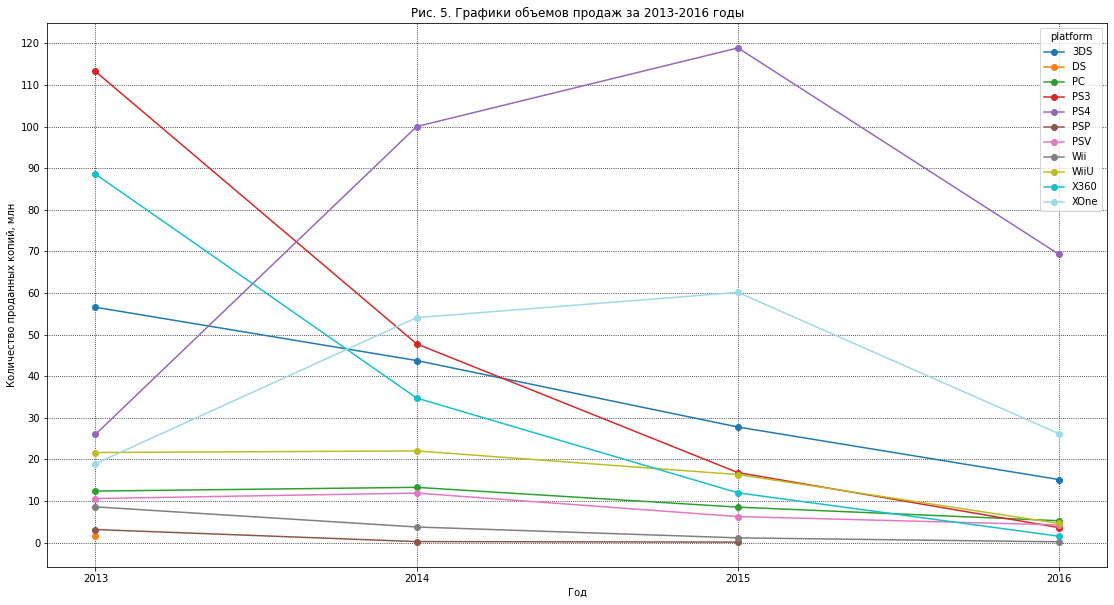

In [46]:
#cоздадим полотно графика, зададим размер
fig, ax = plt.subplots(figsize=(19, 10))

#настроим деления осей
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(10))

df.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum').plot(ax=ax, style='-o', colormap='tab20');

#включим и настроим параметры координатной сетки
ax.grid(which='major', color = 'k', linestyle = ':')

#добавим поясняющие подписи
plt.title('Рис. 5. Графики объемов продаж за 2013-2016 годы')
plt.xlabel('Год')
plt.ylabel('Количество проданных копий, млн');

Анализируя графики на рис. 5, можно сделать следующие **выводы**:
- за актуальный период только две платформы отмечаются ростом продаж с 2013 по 2015 год (2016 год учитывать не будем, так как данные по нему могут быть не полные): PS4, XOne. Для всех остальных платформ в целом наблюдается общее снижение продаж за актуальный период. 
- качестве третьей потенциально прибыльной платформы можно выбрать платформу 3DS: несмотря на тенденцию к снижению продаж, показатели для этой платформы в целом в 2-3 раза больше остальных оставшихся;
- на момент анализа данных возраст платформы PS4 - 4 года, XOne - 4 года. С учетом того, что срок существования платформ около 10 лет, эти платформы будут прибыльными еще 2-3 года. Платформе 3DS - 6 лет, и через несколько лет, возможно, она перестанет быть востребована;
- при планировании кампании на 2017 год следует учитывать, что потенциально прибыльными платформами (в порядке убывания) являются: **PS4** (119 млн копий продано в 2015 году), **XOne** (60 млн копий проданов 2015 году), **3DS** (18 млн копий продано в 2015 году).

### 2.4.2 Построение диаграммы размаха по глобальным продажам игр в разбивке по платформам

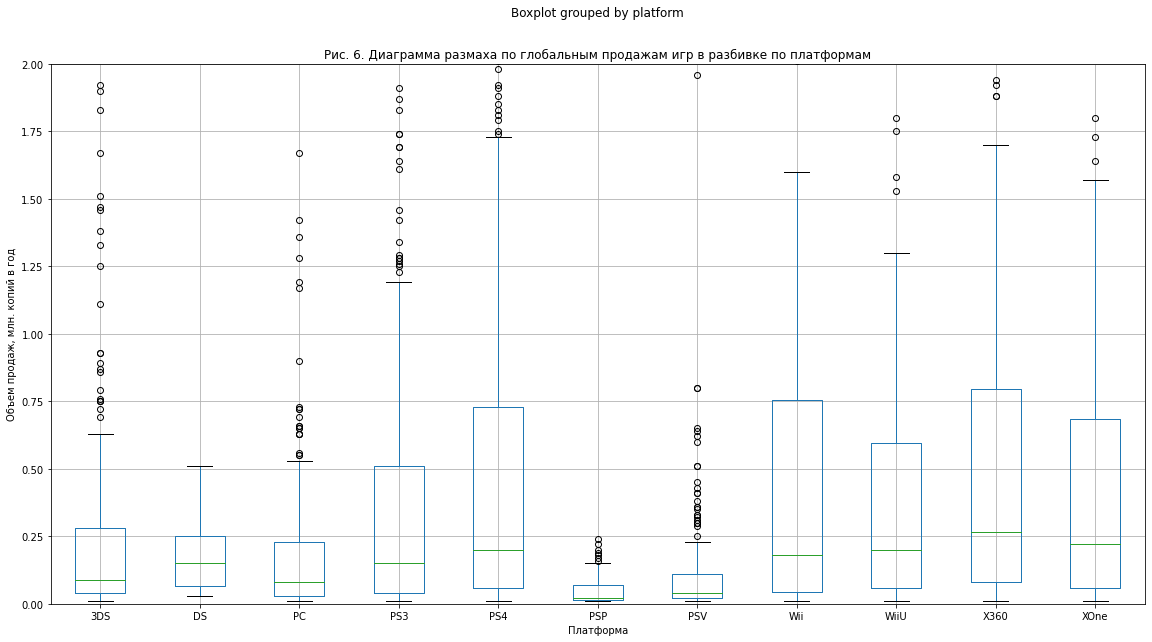

In [47]:
#визуализируем статистическую информацию о глобальных продажах игр в разбивке по платформам
#построим полотно для диаграммы и настроим параметры осей
fig, ax = plt.subplots(figsize=(19, 10))
ax.set(ylim=(0, 2))
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.25))

#построим диаграмму размаха
df.boxplot(column='total_sales', by='platform', ax=ax, grid=True)

#добавим элементы оформления диаграммы
plt.title('Рис. 6. Диаграмма размаха по глобальным продажам игр в разбивке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Объем продаж, млн. копий в год');

Для получения точных численных значений статистической информации о продажах игр по платформам за актуальный период воспользуемся методом describe().

In [48]:
df.groupby(by='platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.472772,1.381347,0.01,0.0400,0.090,0.2800,14.60
DS,8.0,0.192500,0.172026,0.03,0.0675,0.150,0.2525,0.51
PC,189.0,0.208624,0.352304,0.01,0.0300,0.080,0.2300,3.05
PS3,345.0,0.525884,1.451939,0.01,0.0400,0.150,0.5100,21.05
PS4,392.0,0.801378,1.609456,0.01,0.0600,0.200,0.7300,14.63
PSP,67.0,0.052239,0.059768,0.01,0.0150,0.020,0.0700,0.24
PSV,358.0,0.092151,0.153816,0.01,0.0200,0.040,0.1100,1.96
Wii,23.0,0.593913,0.915432,0.01,0.0450,0.180,0.7550,3.58
WiiU,115.0,0.562000,1.038778,0.01,0.0600,0.200,0.5950,7.09


Анализируя полученные диаграммы размаха и статистическую информацию о продажах по платформам, можно сделать следующие **выводы**:
- медианное количество продаж в год для каждой платформы находится в пределах от 0.02 млн/год (PSP) до 0.27 млн/год (X360);
- для 9 из 11 платформ (кроме X360 и XOne) в течение половины периода существования медианное количество продаж не превышало 200 тысяч копий в год;
- для всех платформ верхний предел нормальных значений расположен в несколько раз дальше от медианы, чем нижний, что говорит о высокой вариативности нормальных значений продаж;
- можно выделить четыре группы платформ с разным интервалом нормальных значений:
    - PS4 (наиболее потенциально прибыльная платформа по результатам п. 2.4.1), X360, XOne (вторая по потенциальной прибыльности латформа по результатам п. 2.4.1), Wii. Верхний предел нормальных значений для этих платформ находится в пределах от 1.6 до 1.7 млн копий в год. Характерный межквартильный интервал для этих платформ: 0.6-0.7 млн копий в год;
    - WiiU и PS3 - верхний предел нормальных значений находится в пределах от 1.2 до 1.3 млн копий в год. Характерный межквартильный интервал: ≈0.5 млн копий в год;
    - 3DS, DS, PC - верхний предел нормальных значений находится в пределах от 0.5 до 0.65 млн копий в год. Характерный межквартильный интервал: 0.2-0.25 млн копий в год;
    - PSV, PSP - верхний предел нормальных значений менее 0.3 млн копий в год. Характерный межквартильный интервал:0.05-0.09 млн копий в год.
- среднее значение продаж по платформам в 2-5 раз (за исключением DS) превышает медианное значение, что говорит о наличии для платформ особенно удачных годов с нестандартно высокими продажами.

### 2.4.3 Анализ влияния оценок пользователей и критиков на уровень продаж

На текущем этапе требуется определить наличие взаимосвязи между отзывами критиков и пользвателей на уровень продаж внутри одной популярной платформы, а также проверить, сохраняются ли выявленные закономерности для остальных платформ за актуальный период.

Для анализа выберем наиболее потенциально прибыльную платформу PS4. Построим матрицу рассеивания по столбцам `user_score`, `critic_score`,`total_sales` и рассчитаем коэффициент корреляции между объемами продаж и оценой критиков, объемами продаж и оценкой пользователей.

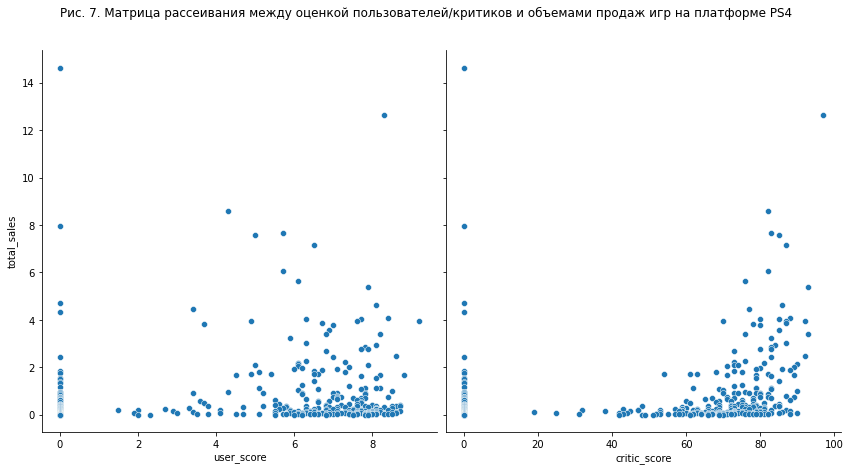

In [49]:
sns.pairplot(df.loc[df['platform']=='PS4', ['user_score', 'critic_score', 'total_sales']],
             x_vars=['user_score', 'critic_score'], y_vars=['total_sales'], height=6).fig.suptitle('Рис. 7. Матрица рассеивания между оценкой пользователей/критиков и объемами продаж игр на платформе PS4', y=1.08);

Из анализа диаграмм рассеивания можно сказать следующее:
- в большинстве случаев оценка пользователей находится в пределах от 4.7 до 9, оценка критиков - от 40 до 90;
- явной корелляции между оценками пользователей/критиков и количеством проданных копий не наблюдается, однако присутствуют единичные увеличения продаж при увеличении оценки пользователей (от 4) и оценки критиков (от 70);

Рассчитаем коэффициент корреляции между оценками пользователей/критиков и количеством проданных копий отдельно для платформы PS4 и для всех платформ, попавших в актуальный период. Исключим из расчетов строки с нулевыми оценками пользователей/критиков.

In [50]:
#df.loc[(df['platform']=='PS4')|(df['critic_score']>0)|(df['user_score']>0), ['user_score', 'critic_score', 'total_sales']].corr()
print('Матрица корреляции между оценками пользователей (user_score) и объемом продаж (total_sales)')
df.loc[(df['platform']=='PS4')&(df['user_score']>0), ['user_score', 'total_sales']].corr()

Матрица корреляции между оценками пользователей (user_score) и объемом продаж (total_sales)


,user_score,total_sales
user_score,1.000000,-0.031957
total_sales,-0.031957,1.000000


In [51]:
#df.loc[(df['platform']=='PS4')|(df['critic_score']>0)|(df['user_score']>0), ['user_score', 'critic_score', 'total_sales']].corr()
print('Матрица корреляции между оценками критиков (critic_score) и объемом продаж (total_sales)')
df.loc[(df['platform']=='PS4')&(df['critic_score']>0), ['critic_score', 'total_sales']].corr()

Матрица корреляции между оценками критиков (critic_score) и объемом продаж (total_sales)


,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


Корелляция между оценками критиков и количеством продаж составляет 0.41 что говорит о наличии некоторой положительной связи, но она недостаточно сильная.

Корреляция между оценками пользователей и количеством продаж составляет всего -0.03% процента, что говорит об отсутствии связи. Действительно, если посмотреть на рис. 7, можно заметить, что уровень продаж во всем диапазоне оценок пользователей примерно одинаковый.

Рассчитаем коэффициенты корреляции объемов продаж с оценками критиков/пользователей для всех платформ за актуальный период и оформим их в таблицу. Расчеты проведем в три этапа:
- для расчета коэффиента корреляции между оценками пользователей и уровнем продаж определим количество ненулевых оценок пользователя для каждой платформы;
- для расчета коэффиента корреляции между оценками критиков и уровнем продаж определим количество ненулевых оценок критиков для каждой платформы;
- исключим из обработки платформы со слишком маленьким объемом выборки;
- рассчитаем коэффициент корреляции между оценками пользователей/критиков и уровнем продаж.

In [52]:
#рассчитаем объем выборок с ненулевым количеством оценок пользователей/критиков
df[df['user_score']>0].groupby('platform')['user_score'].count().reset_index().set_index('platform').join(df[df['critic_score']>0].groupby('platform')['critic_score'].count().reset_index().set_index('platform'))

,user_score,critic_score
platform,,
3DS,80,71.0
DS,1,NaN
PC,155,149.0
PS3,186,121.0
PS4,257,252.0
PSP,2,1.0
PSV,99,77.0
Wii,7,NaN
WiiU,80,70.0


В результате расчета объемов выборки с количеством ненулевых оценок критиков/пользователей было выявлено, что выборки для платформ DS, PSP и Wii либо слишком маленькие, либо представляют собой пустое множество. Исключим их из расчета корреляции.

In [53]:
#создадим списки с наименованием платформ и типами оценок (пользователей, критиков)
platforms=['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'WiiU', 'X360', 'XOne']
type_of_scores=['user_score', 'critic_score']

#создадим в словаре заголовки колонок таблицы
corr_dict={'platform': ['user_score', 'critic_score']}

#начало цикла расчетов
for platform in platforms:
    corr_dict[platform]=[]
    for type_of_score in type_of_scores:
        #расчитаем коэффициенты корреляции и сохраним их в словарь списков
        corr_dict[platform].append(df.loc[(df['platform']==platform)&(df[type_of_score]>0), 'total_sales'].corr(df[type_of_score]))
        
#преобразуем словарь списков в таблицу    
df_corr=pd.DataFrame(corr_dict)

#отобразим результат
df_corr

,platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
0,user_score,0.241504,-0.093842,0.002394,-0.031957,0.000942,0.419330,-0.011742,-0.068925
1,critic_score,0.357057,0.196030,0.334285,0.406568,0.254742,0.376415,0.350345,0.416998


Общая картина корреляции для платформ в актуальном периоде соответствует результатам, полученным для PS4: для большинства платформ коэффициент корреляции между оценками пользователей и объемом продаж не превышает значения 0.1 (по модулю), коэффициент корреляции между оценками критиков и объемом продаж не превышает 0.4. Исключение составляют платформы 3DS и WiiU, для которых влияние оценок критиков и пользователей на объем продаж примерно одинаково, однако коэффициент корреляции также не превышает 0.4.

## 2.5 Анализ продаж по жанрам за актуальный период

На текущем этапе требуется проанализировать объемы продаж по жанрам за актуальный период.
Рассмотрим, как распределены объемы продаж по жанрам за весь актуальный период и каждый год в течение актуального периода.

1) Построим столбчатую диаграмму объемов продаж по жанрам за 2013-2016 гг.:

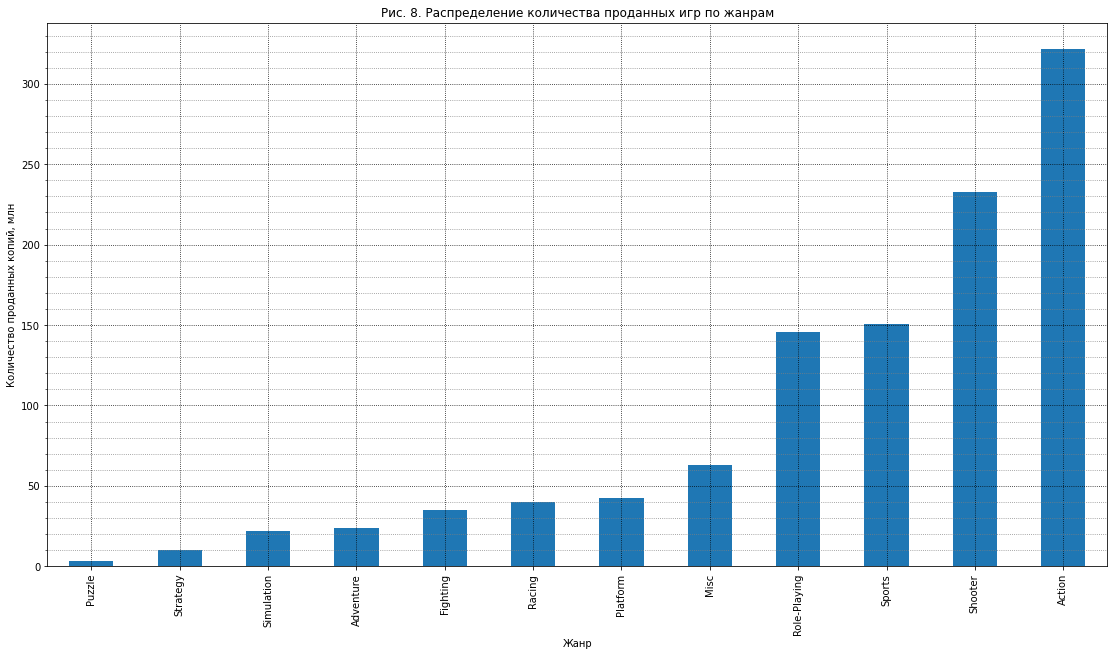

In [54]:
#построим полотно для диаграммы
fig, ax = plt.subplots(figsize=(19, 10))


#сгруппируем данные и построим диаграмму
df.pivot_table(index='genre', values='total_sales', aggfunc='sum').reset_index().sort_values(by='total_sales')\
.plot(kind='bar', x='genre', y='total_sales', legend=False, ax=ax)

#настроим параметры осей
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))

#включим и настроим параметры координатной сетки
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'gray', linestyle = ':')

#добавим поясняющие подписи
plt.title('Рис. 8. Распределение количества проданных игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданных копий, млн');

Анализируя диаграмму на рис. 8, можно сделать следующие **выводы**:
- за 2013-2016 гг продаются игры 12 жанров (в порядке возрастания объема продаж): Puzzle, Strategy, Simulation, Adventure, Fighting, Racing, Platform, Misc, Role-Playing, Sports, Shooter, Action;
- все представленные на рис. 8 жанры можно разделить на три группы:
    - наиболее продающиеся: Action и Shooter (продано 310 и 241 млн копий в год соответственно);
    - средней продаваемости: Sports и Role-Playing (продано 150 и 145 млн копий в год соответственно;
    - наименее продающиеся: Puzzle, Strategy, Simulation, Adventure, Fighting, Racing, Platform, Misc (продано менее 65 млн копий каждого жанра). Наиболее низкими продажами отмечаются жанры Strategy и Puzzle - за 2013-2016 гг продано 5 и 3 млн копий соответственно.

2) Построим столбчатую диаграмму объемов продаж каждого жанра в разбивке по годам за актуальный период

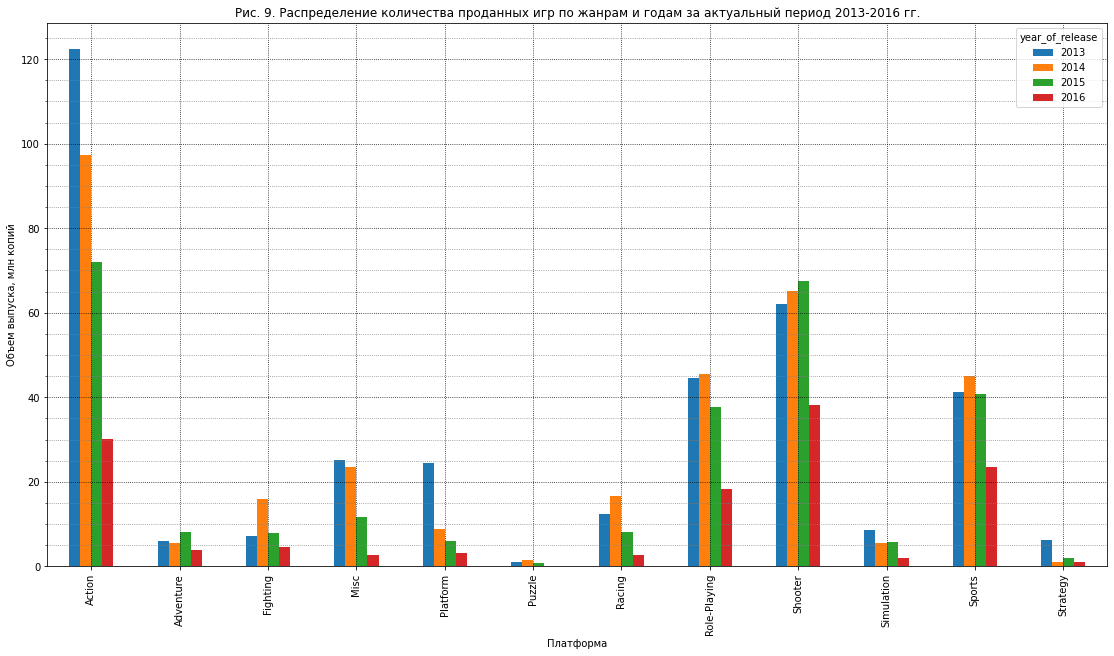

In [55]:
#построим полотно для диаграммы
fig, ax = plt.subplots(figsize=(19, 10))

#рассчитаем общее количество продаж в год для игровых жанров в актуальном периоде
df.pivot_table(index='genre', columns='year_of_release', values='total_sales', aggfunc='sum')\
.plot(kind='bar', ax=ax)

#настроим параметры осей
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

#включим и настроим параметры координатной сетки
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'gray', linestyle = ':')


#добавим элемента оформления диаграммы
plt.title('Рис. 9. Распределение количества проданных игр по жанрам и годам за актуальный период 2013-2016 гг.');
plt.xlabel('Платформа')
plt.ylabel('Объем выпуска, млн копий');

Анализируя диаграмму на рис. 9, можно сделать следующие **выводы**:
- для всех жанров объем продаж за 2016 год ниже всех предыдущих, за исключением наименее популярных жанров Strategy (в 2014 году продано столько же, сколько и в 2016 г.) и Puzzle (продажи либо не выражаются в масштабах графика, либо отсутствуют). Однако, как отмечалось ранее, данные за 2016 год могут быть неполными и поэтому не отражать общую картину.
- для наиболее популярного жанра Action  пик продаж зафиксирован в 2013 году (свыше 120 млн копий), после чего объем продаж ежегодно снижался ~на 25 млн копий и к 2015 году достиг отметки в 74 млн копий, что, однако, по-прежнему выше объемов продаж других жанров в любой из годов 2013-2016. В 2016 г. объем продаж игр жанра Action составляет 30 млн копий. В целом можно сказать, что несмотря на высокие объемы продаж популярность жанра Action имеет тенденцию к снижению;
- второй по показателям объемов продаж жанр Shooter, напротив, постепенно набирает популярность: так, с 2013 по 2015 г. объем продаж повысился с 62.5 до 67.5 млн копий в год. В 2016 г. объем продаж жанра Shooter составляет 48 млн копий;
- для жанров Role-Playing и Sports (средний объем продаж, исходя из диаграммы на рис. 8) тенденцию к росту или снижению продаж выявить затруднительно. В 2013 году объем продаж составляет (соответственно) 45 и 41 млн копий, в 2014 - увеличивается до 45.5 и 45 млн копий, к 2015 г. снижается до 47.5 и 40.5 млн копий. В 2016 году игр жанра Role-Playing продано 18 млн копий, игра жанра Sports - 24 млн копий;
- для наименее популярных игр наибольшие продажи наблюдаются в 2013-2014 гг для жанра Misc (25 млн и 24 млн копий), для в 2013 г. для жанра Platform (~25 млн копий). От 10 млн до 18 млн копий продано жанров Fighting и Racing в 2014 году. Остальные продажи не превышают 10 млн копий в год. Отдельно стит выделить наиболее низкие продажи: объем продаж игр Puzzle не превышает 2 млн копий в год,  объем продаж игр Strategy не превышает 2.5 млн копий в год за 2014-2016 гг.

Определим общее количество игр (уникальных наименований) в каждом жанре. Визуализируем результат с помощью столбчатой диаграммы.

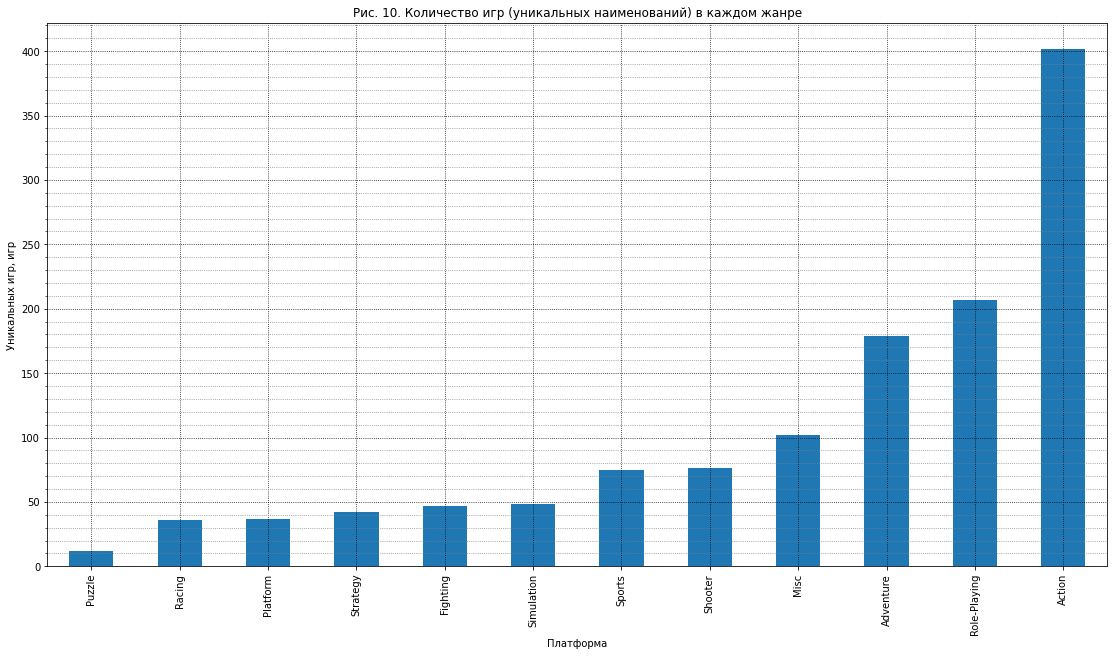

In [56]:
#построим полотно для диаграммы
fig, ax = plt.subplots(figsize=(19, 10))

#рассчитаем количество игр в каждом жанре
df.groupby(by='genre')['name'].nunique().reset_index().sort_values(by='name').plot(kind='bar', x='genre', ax=ax, legend=False)

#настроим параметры осей
ax.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(10))

#включим и настроим параметры координатной сетки
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'gray', linestyle = ':')


#добавим элемента оформления диаграммы
plt.title('Рис. 10. Количество игр (уникальных наименований) в каждом жанре');
plt.xlabel('Платформа')
plt.ylabel('Уникальных игр, игр');

Наибольшим выбором игр отличается жанр Action (~ 400 игр), лидирующий по количеству продаж в течение 2013-2016 гг (>320 млн копий).
На втором месте по разнообразию наименований находится жанр Role-Playing (208 игр), занимающий в рейтинге продаж четвертое место (~ 100 млн копий);
Третий по количеству игр - жанр Adventure (178 игр), занимающий в общем рейтинге продаж только 9 место (~ 35 млн копий). 
При этом игры Shooter, вторые по объему продаж (>230 млн копий), по разнообразию игр - только пятые (<80 игр).


Рассчитаем медианное количество продаж каждого жанра за актуальный период.

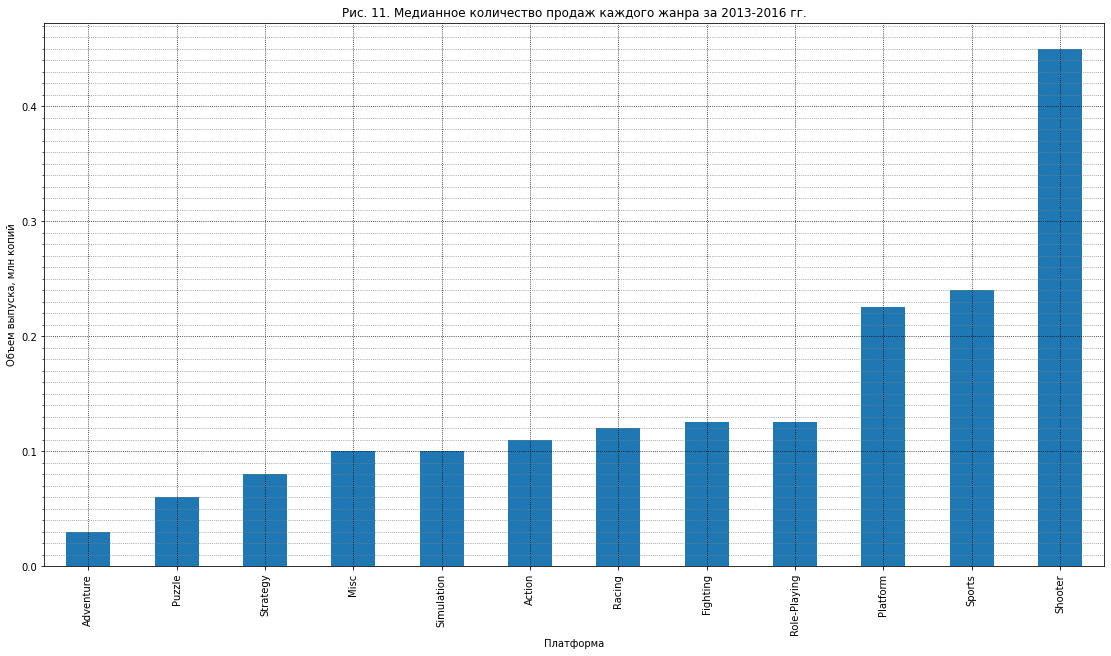

In [57]:
#построим полотно для диаграммы
fig, ax = plt.subplots(figsize=(19, 10))

df.groupby(by='genre')['total_sales'].median().reset_index().sort_values(by='total_sales').plot(kind='bar', x='genre', ax=ax, legend=False)

#настроим параметры осей
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.01))

#включим и настроим параметры координатной сетки
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'gray', linestyle = ':')


#добавим элемента оформления диаграммы
plt.title('Рис. 11. Медианное количество продаж каждого жанра за 2013-2016 гг.');
plt.xlabel('Платформа')
plt.ylabel('Объем выпуска, млн копий');

Анализируя диаграмму на рис. 11, можно сделать следующие **выводы**:
- наибольшее медианное количество продаж наблюдается у жанра Shooter (2-й по объему продаж, 5-й по количеству игр);
- на втором и третьем месте находятся жанры Sports (3 по объему продаж, 6-й по количеству игр) и Platform (6-й по объему продаж, 10-й по количеству игр);
- жанр Action - с наибольшим сммарным количеством продаж и наибольшим количеством игр - занимает в рейтинге медианных продаж только 7 место;
- суммируя все вышесказанное, можно сказать следующее:
    - жанр Action лидирует в общем количестве продаж за счет большого разнообразия игр;
    - наиболее популярны игры Shooter, Sports и Platform;
    - в рамках дальнейшего развития наиболее выгодно вкладываться в разработку новых игр жанров Shooter, Sports и Platform.

# 3. Составление портрета пользователя каждого региона

В рамках определения портрета пользователя для Североамериканского континента, Европы и Японии требуется:
- определить для каждого региона топ-5 самых популярных платформ;
- определить топ-5 самых популярных жанров;
- выявить влияние рейтинга ESRB на уровень продаж в регионе.

Дополнительно рассчитаем, какая доля всех продаж в мире приходится на разные регионы.

## 3.1 Определение доли продаж в каждом регионе в общем количестве продаж

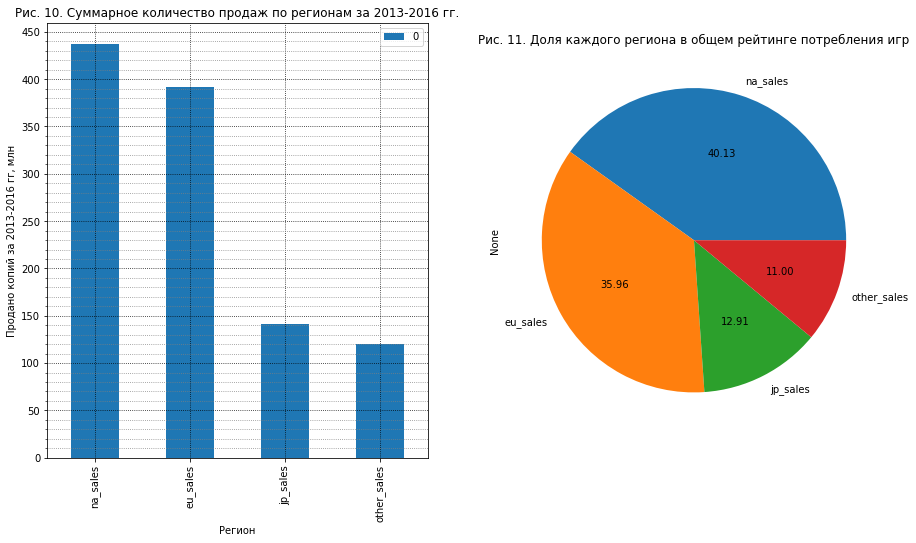

In [58]:
#создадим полотно для построения диаграмм
fig = plt.figure(figsize=(15,8))

#построим столбчатую диаграмму общего распределения продаж по регионам за актуальный период
ax1 = fig.add_subplot(121)
df.loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().reset_index().plot(kind='bar', x='index', ax=ax1,\
        ylabel='Продано копий за 2013-2016 гг, млн', xlabel='Регион', \
        title='Рис. 10. Суммарное количество продаж по регионам за 2013-2016 гг.')

#построим круговую диаграмму с долей каждого региона в общем количестве продаж
ax2 = fig.add_subplot(122)
df.loc[:, ['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum().plot(kind='pie', x='index', y=0, autopct='%.2f', ax=ax2,\
        title='Рис. 11. Доля каждого региона в общем рейтинге потребления игр')

#настроим параметры осей
ax1.yaxis.set_major_locator(ticker.MultipleLocator(50))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(10))

#включим и настроим параметры координатной сетки
ax1.grid(which='major', color = 'k', linestyle = ':')
ax1.grid(which='minor', color = 'gray', linestyle = ':')

Анализируя диаграммы на рис. 10-11, можно сделать следующие **выводы**:
- 76% рынка сбыта компьютерных игр составляет Северная Америка и Европа (40% и 36% соответственно);
- оставшиеся 24% приходятся практически поровну на Японию и оставшиеся регионы (13% и 11% соответственно);
- полученные результаты можно объяснить количеством населения рассматриваемых регионов: так, население [Европы](http://www.world-globe.ru/regions/europe/population/#:~:text=%D0%9F%D0%BE%20%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%D0%BC%2C%20%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%95%D0%B2%D1%80%D0%BE%D0%BF%D1%8B,%D0%BC%D0%BE%D0%BC%D0%B5%D0%BD%D1%82%20%D1%81%D0%BE%D1%81%D1%82%D0%B0%D0%B2%D0%BB%D1%8F%D0%B5%D1%82%200%2C21%25%20%D0%B2%20%D0%B3%D0%BE%D0%B4) на 2016 год составляет 741 млн человек, население [Североамериканского континента](http://www.world-globe.ru/regions/north-america/population/#:~:text=%D0%9F%D0%BE%20%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%D0%BC%2C%20%D1%87%D0%B8%D1%81%D0%BB%D0%B5%D0%BD%D0%BD%D0%BE%D1%81%D1%82%D1%8C%20%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F%20%D0%A1%D0%B5%D0%B2%D0%B5%D1%80%D0%BD%D0%BE%D0%B9,%D0%B3%D0%B5%D0%BE%D0%B3%D1%80%D0%B0%D1%84%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B8%20%D1%8F%D0%B2%D0%BB%D1%8F%D1%8E%D1%82%D1%81%D1%8F%20%D1%87%D0%B0%D1%81%D1%82%D1%8C%D1%8E%20%D0%A1%D0%B5%D0%B2%D0%B5%D1%80%D0%BD%D0%BE%D0%B9%20%D0%90%D0%BC%D0%B5%D1%80%D0%B8%D0%BA%D0%B8)) - 533 млн человек, население [Японии](https://lemzspb.ru/yaponiya-naseleniye-chislennost-2016-schetchik/#:~:text=%D0%A1%D0%BE%D0%B3%D0%BB%D0%B0%D1%81%D0%BD%D0%BE%20%D0%BE%D1%86%D0%B5%D0%BD%D0%BA%D0%B0%D0%BC%20%D0%9E%D0%9E%D0%9D%2C%20%D0%BD%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%AF%D0%BF%D0%BE%D0%BD%D0%B8%D0%B8,%D1%81%D0%BE%D0%BA%D1%80%D0%B0%D1%82%D0%B8%D1%82%D1%81%D1%8F%20%D0%B4%D0%BE%2090%20%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%BE%D0%B2%20%D1%87%D0%B5%D0%BB%D0%BE%D0%B2%D0%B5%D0%BA) - 126 млн человек *(сказать, какое количество человек проживает в других регионах нельзя, так как неизвестно, охватывает ли эта категория все остальные существующие регионы. Судя по суммарному объему продаж игр для этой категории - нет)*. Стоит отметить, что несмотря на то, что население Европы в 1.4 раза больше населения Северной Америки, общее потребление игр в Европе на 10% меньше. Предположив, что за 2013-2016 гг население рассматриваемых регионов практически не менялось, можно сказать, что за 2013-2016 гг на душу населения Северной Америки куплено ~0.8 игр, на душу населения в Европе - ~0.5 игры, на душу населения в Японии - ~1.1 игр. Таким образом, население Японии более склонно к игромании, чем, например, население Европы или Северной Америки *(однако, это наблюдение более интересно для демографических исследований, в рамках планирования продаж все-таки более интересен общий оборот)*;
- в анализ следует включить "другие" регионы, так как их объем продаж сопоставим с объемом продаж в Японии.

## 3.1 Анализ популярности платформ

Построим сводную таблицу, содержащую информацию о ТОП-5 платформах в каждом регионе: наименование и количество проданных игр.

In [59]:
#соберем таблицу
total_t5_platf = df.loc[:, ['platform', 'na_sales']].pivot_table(index='platform', aggfunc='sum').nlargest(5, 'na_sales').reset_index()\
.join(df.loc[:, ['platform', 'eu_sales']].pivot_table(index='platform', aggfunc='sum').nlargest(5, 'eu_sales').reset_index(), lsuffix='_na', rsuffix='_eu' )\
.join(df.loc[:, ['platform', 'jp_sales']].pivot_table(index='platform', aggfunc='sum').nlargest(5, 'jp_sales').reset_index())\
.join(df.loc[:, ['platform', 'other_sales']].pivot_table(index='platform', aggfunc='sum').nlargest(5, 'other_sales').reset_index(), lsuffix='_jp', rsuffix='_other' )

#выведем результат
total_t5_platf

,platform_na,na_sales,platform_eu,eu_sales,platform_jp,jp_sales,platform_other,other_sales
0,PS4,108.74,PS4,141.09,3DS,67.81,PS4,48.35
1,XOne,93.12,PS3,67.81,PS3,23.35,PS3,26.77
2,X360,81.66,XOne,51.59,PSV,18.59,XOne,14.27
3,PS3,63.50,X360,42.52,PS4,15.96,X360,12.11
4,3DS,38.20,3DS,30.96,WiiU,10.88,3DS,6.28


Анализируя полученную сводную таблицу, можно сказать следующее:
- в Северной Америке, Европе, других регионах в ТОП-5 платформ входит три платформы японского производства: PS4, PS3, 3DS - и две платформы американской фирмы Microsoft: XOne, X360;
- в Европе и других регионах платформы популярны в следующем порядке: PS4, PS3, XOne, X360, 3DS;
- в Северной Америке первое место занимает японская PS4, затем - американские XOne, X360, замыкают список - японские PS4 и 3DS;
- в Японии весь ТОП-5 занимают платформы японского производства фирм Nintendo и Sony (в порядке убывания): 3DS, PS3, PSV, PS4, WiiU. Примечательно, что первое место в Японии занимает платформа 3DS, которая для остальных регионов находится на пятом месте, в то время как самая популярная в остальных регонах PS4 в Японии находится только на 4 месте. Кроме того, в ТОП-5 платформ для Японии входят платформу PSV и WiiU, не представленные в ТОП-5 остальных регионов;
- отличия ТОП-5 платформ в регионах-производителях платформ могут быть обусловлены как менталитетом и желанием поддержать отечественного производителя (особенно характерно для [Японии](https://ixbt.games/news/keiji-inafune-o-tom-pochemu-xbox-360-ne-stala-populyarnoy-v-yaponii.html?)), так и вероятностью того, что японские и американские разработчики создают игры и платформы с учетом запросов собственного населения.

Рассмотрим вклад всех попавших в ТОП-5 платформ в общее количество продаж в мире.

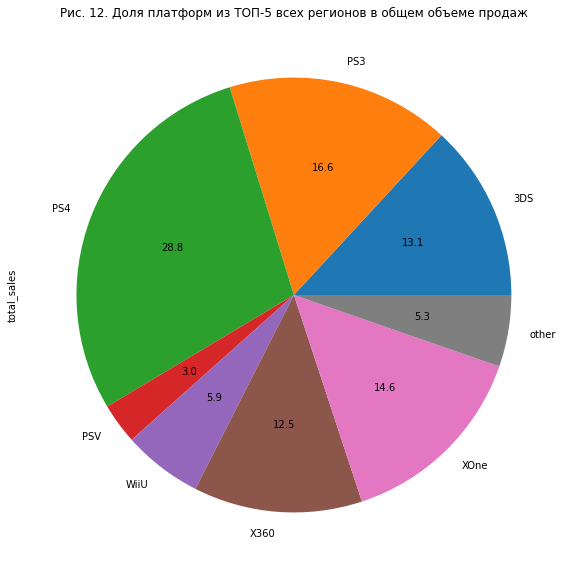

In [60]:
#создадим полотно для творчества :)
fig, ax = plt.subplots(figsize=(10,10))

#с помощью сводной таблицы рассчитаем процент продаж для каждой платформы из ТОП-5 для региона и построим круговые диаграммы
df_pie=pd.DataFrame()
df_pie=df.pivot_table(index='platform', aggfunc='sum').reset_index()
df_pie['platform']=df_pie['platform'].where(df_pie['platform'].isin(['PS4', 'PS3', 'XOne', 'X360', '3DS', 'PSV', 'WiiU']), 'other')
df_pie.groupby(by='platform')['total_sales'].sum().plot(y='total_sales', kind='pie', autopct='%.1f', ax=ax, \
       title='Рис. 12. Доля платформ из ТОП-5 всех регионов в общем объеме продаж');

Исходя из диаграммы на рис. 12, платформа PS4 также занимает лидирующее положение, охватывая практически 30% рыка игр. Еще 30% суммарно приходятся на платформы PS3 и XOne, имеющие практически равную долю продаж. По ~13% приходится на платформы 3DS и X360, оставшиеся 14% делят между собой платформы PSV, WiiU и другие. В целом, на платформы японского происхождения приходится минимум 67.6% рынка.

Построим диаграммы с информацией о доле каждой платформы из ТОП-5 в общем рынке игр для региона.

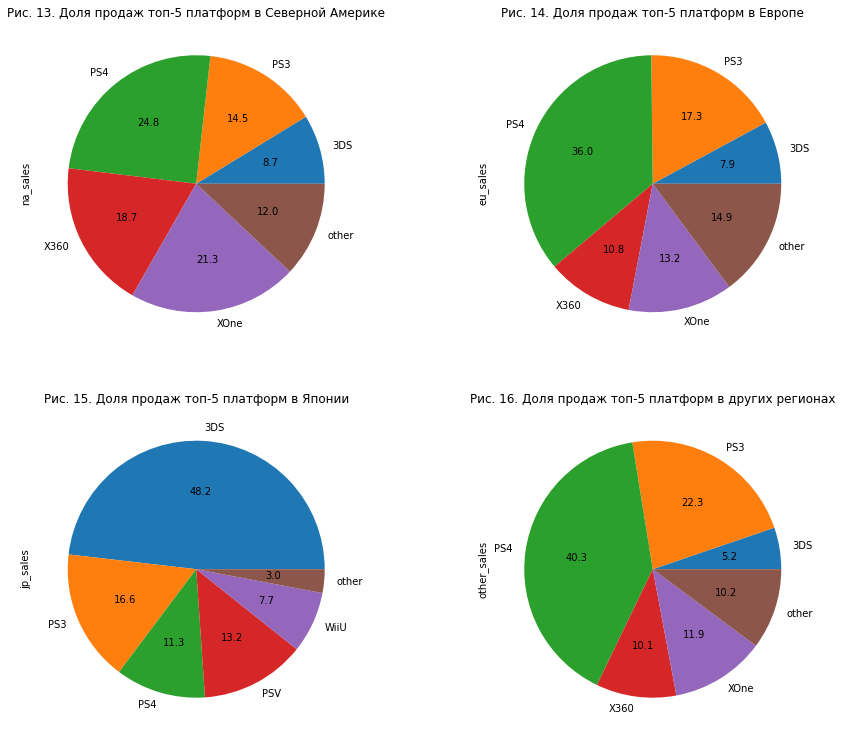

In [61]:
#создадим полотно для творчества :)
fig = plt.figure(figsize=(15,13))
#создадим список регионов и список с порядковыми номерами диаграмм
lst_of_rgn=['na', 'eu', 'jp', 'other']
pie_number=[221, 222, 223, 224]

#создадим список с заголовками диаграмм
titles=['Рис. 13. Доля продаж топ-5 платформ в Северной Америке', 'Рис. 14. Доля продаж топ-5 платформ в Европе',
        'Рис. 15. Доля продаж топ-5 платформ в Японии', 'Рис. 16. Доля продаж топ-5 платформ в других регионах']

#с помощью сводной таблицы рассчитаем процент продаж для каждой платформы из ТОП-5 для региона и построим круговые диаграммы
for i, rgn in enumerate(lst_of_rgn):
    df_pie=pd.DataFrame()
    df_pie=df.loc[:, [(rgn+'_sales'), 'platform']].pivot_table(index='platform', aggfunc='sum').reset_index()
    ax = fig.add_subplot(pie_number[i])
    df_pie['platform']=df_pie['platform'].where(df_pie['platform'].isin(list(total_t5_platf[('platform_'+rgn)])), 'other')
    df_pie.groupby(by='platform')[rgn+'_sales'].sum().plot(y=(rgn+'_sales'), kind='pie', autopct='%.1f', ax=ax, title=titles[i]);

Анализируя полученные диаграммы, можно делать следующие **выводы**:
- 48% рынка в Северной Америке приходится на японские платформы PS4 (24.8%), PS3 (14.5%), 3DS(8.7%), 40% - на американские платформы XOne и X360 (21.3 и 18.7% соответственно). Оставшиеся 12% приходятся на остальные платформы.
- в Европе 61.2% рынка игр приходится на японские платформы (36.0%), PS3 (17.3%), 3DS(7.9%). Американские платформы занимают 24% (XOne - 13.2%, X360 - 10.8%);
- в Японии минимум 97% рынка занято платформами японского производства *(производство оставшихся трех процентов в рамках проекта не проверялось)*, при этом почти половину рынка занимает платформа 3DS (48.2%), затем примерно с одинаковыми долями идут PS3 (16.6%), PS4 (11.3%), PSV (13.2%), замыкает - WiiU (7.7%);
- для других регионов японские платформы PS4, PS3 и 3DS в общей сложности занимают 67.8% (40.3, 22.3, 5.2% соответственно), оставшиеся 32.1% практически поровну делят между собой платфнормы X360 (10.1%), XOne (11.9%), оставшиеся (10.2);
- суммируя все вышесказанное, можно сказать, что лидирующее положение на рынке игр в каждом регионе занимают японские платформы;
- доли платформ X360 и XOne в каждом регионе примерно равны (с погрешностью в 3%), при этом их популярность в Северной Америке в два раза выше (~ 20% на платформу), чем в Европе или других (other) регионах (~10% на платформу);
- в Северной Америке, Европе и других регионах ТОП-5 платформ охватывают 85-90% рынка игр, в Японии - 95%.

# 3.2 Анализ популярности жанров

Построим сводную таблицу, содержащую информацию о ТОП-5 платформах в каждом регионе: наименование и количество проданных игр.

In [62]:
#соберем таблицу
total_t5_genres = df.loc[:, ['genre', 'na_sales']].pivot_table(index='genre', aggfunc='sum').nlargest(5, 'na_sales').reset_index()\
.join(df.loc[:, ['genre', 'eu_sales']].pivot_table(index='genre', aggfunc='sum').nlargest(5, 'eu_sales').reset_index(), lsuffix='_na', rsuffix='_eu' )\
.join(df.loc[:, ['genre', 'jp_sales']].pivot_table(index='genre', aggfunc='sum').nlargest(5, 'jp_sales').reset_index())\
.join(df.loc[:, ['genre', 'other_sales']].pivot_table(index='genre', aggfunc='sum').nlargest(5, 'other_sales').reset_index(), lsuffix='_jp', rsuffix='_other' )

#выведем результат
total_t5_genres

,genre_na,na_sales,genre_eu,eu_sales,genre_jp,jp_sales,genre_other,other_sales
0,Action,126.05,Action,118.13,Role-Playing,51.04,Action,37.20
1,Shooter,109.74,Shooter,87.86,Action,40.49,Shooter,28.77
2,Sports,65.27,Sports,60.52,Misc,9.20,Sports,19.45
3,Role-Playing,46.40,Role-Playing,36.97,Fighting,7.65,Role-Playing,11.48
4,Misc,27.49,Racing,20.19,Shooter,6.61,Misc,6.09


Анализируя полученную сводную таблицу, можно сказать следующее:
- в Северной Америке, Европе и других регионах первые четыре места в ТОП-5 жанров в одинаковом порядке занимают Action, Shooter, Sports, Role-Playing. Различия в предпочтениях обнаруживаются только в конце рейтинга: в Cеверной Америке и других регионах ТОП-5 жанров замыкает Misc, в Европе - Racing;
- в Японии лидирующее положение занимают игры Role-Playing, на втором месте - Acton, замыкают - в порядке убывания - Misc, Fighting, Shooter. Как и в случае с платформами, ТОП-5 популярных жанров Японии отличается от остальных регионов;

Рассмотрим вклад всех попавших в ТОП-5 платформ в общее количество продаж в мире.

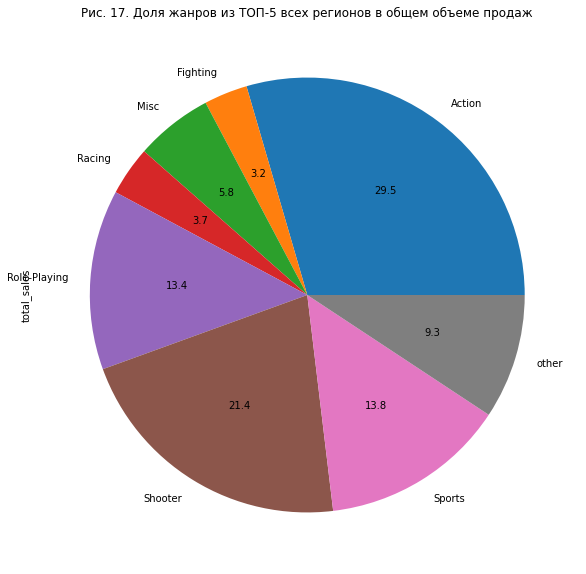

In [63]:
#создадим полотно для творчества :)
fig, ax = plt.subplots(figsize=(10,10))

#с помощью сводной таблицы рассчитаем процент продаж для каждой платформы из ТОП-5 для региона и построим круговые диаграммы
df_pie=pd.DataFrame()
df_pie=df.pivot_table(index='genre', aggfunc='sum').reset_index()
df_pie['genre']=df_pie['genre'].where(df_pie['genre'].isin(['Action', 'Shooter', 'Sports', 'Role-Playing', 'Misc', 'Racing', 'Fighting']), 'other')
df_pie.groupby(by='genre')['total_sales'].sum().plot(y='total_sales', kind='pie', autopct='%.1f', ax=ax, \
       title='Рис. 17. Доля жанров из ТОП-5 всех регионов в общем объеме продаж');

Исходя из диаграммы на рис. 16, 30% рынка игр приходится на жанр Action, 20% рынка - на игры Shooter. Игры Role-Playing и Sports обладают примерно одинаковой популярностью (по 13.5%), жанры Racing, Misc и Fighting делят между собой 13% рынка. Оставшиеся 9% приходятся на остальные жанры, не вошедшие в ТОП-5 хотя бы одного региона.

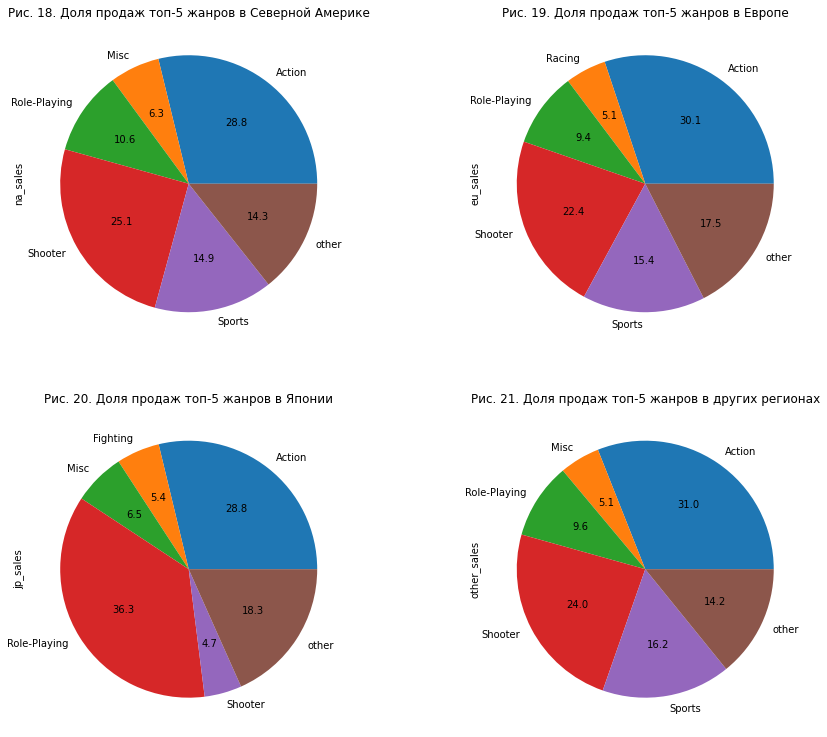

In [64]:
#создадим полотно для творчества :)
fig = plt.figure(figsize=(15,13))
#создадим список регионов и список с порядковыми номерами диаграмм
lst_of_rgn=['na', 'eu', 'jp', 'other']
pie_number=[221, 222, 223, 224]

#создадим список с заголовками диаграмм
titles=['Рис. 18. Доля продаж топ-5 жанров в Северной Америке', 'Рис. 19. Доля продаж топ-5 жанров в Европе',
        'Рис. 20. Доля продаж топ-5 жанров в Японии', 'Рис. 21. Доля продаж топ-5 жанров в других регионах']

#с помощью сводной таблицы рассчитаем процент продаж для каждой платформы из ТОП-5 для региона и построим круговые диаграммы
for i, rgn in enumerate(lst_of_rgn):
    df_pie=pd.DataFrame()
    df_pie=df.loc[:, [(rgn+'_sales'), 'genre']].pivot_table(index='genre', aggfunc='sum').reset_index()
    ax = fig.add_subplot(pie_number[i])
    df_pie['genre']=df_pie['genre'].where(df_pie['genre'].isin(list(total_t5_genres[('genre_'+rgn)])), 'other')
    df_pie.groupby(by='genre')[rgn+'_sales'].sum().plot(y=(rgn+'_sales'), kind='pie', autopct='%.1f', ax=ax, title=titles[i])

Анализируя полученные диаграммы, можно сделать следующие **выводы**:
- для Северной Америки, Европы и "других" регионов ТОП-5 жанров охватывают 82-86% рынка, разделив доли в примерном соотношении 30:25:15:10:5 (Action **:** Shooter **:** Spors **:** Role-Playing **:** Misc/Rasing), что характерно для общего распределения объема продаж по жанрам в целом. Это можно учитывать в распределении рекламного бюджета;
- в Японии ТОП-5 жанров охватывает 82% рынка, соотношение долей: 36:30:5:5:5 (Role-Playing **:** Action **:** Misc **:** Fighting **:** Shooter);
- в целом можно сказать, что игроки из Северной Америки, Европы и "других" регионов обладают схожим пользовательским портретом как по используемым платформам, так и по игровым предпочтениям. Предпочтения жителей Японии касательно платформ и жанров иные, что, вероятно, обусловлено культурными особенностями.

# 3.3 Анализ вляния рейтинга ESRB на объемы продаж по регионам

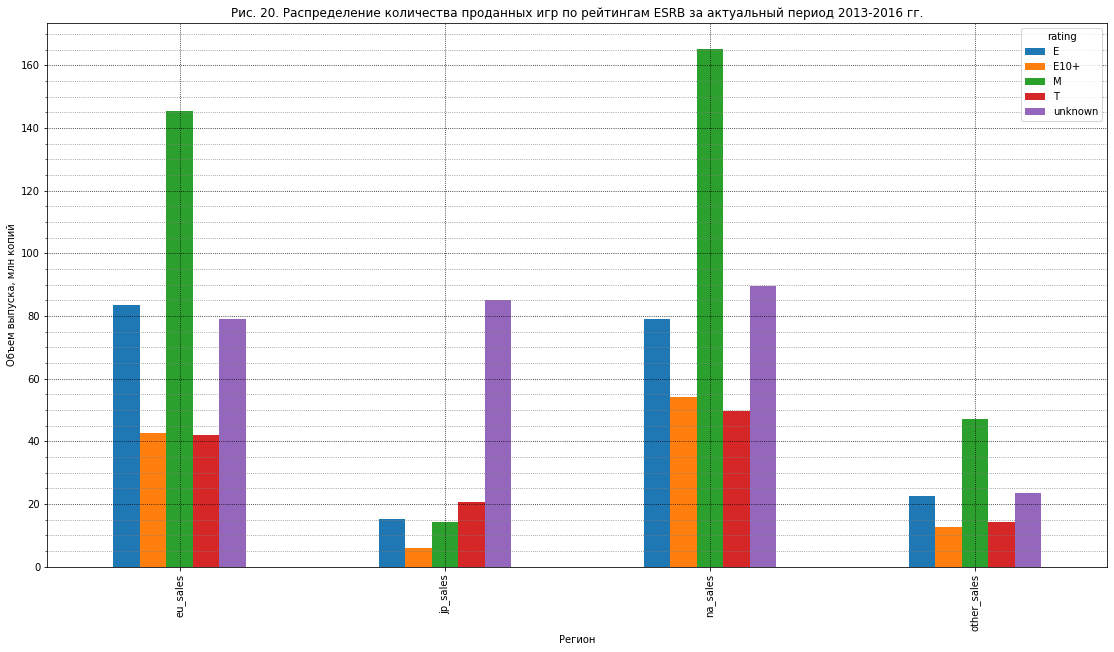

In [65]:
#построим полотно для диаграммы
fig, ax = plt.subplots(figsize=(19, 10))

df.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc='sum').T.plot(kind='bar', ax=ax)
#настроим параметры осей
ax.yaxis.set_major_locator(ticker.MultipleLocator(20))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(5))

#включим и настроим параметры координатной сетки
ax.grid(which='major', color = 'k', linestyle = ':')
ax.grid(which='minor', color = 'gray', linestyle = ':')

#добавим элемента оформления диаграммы
plt.title('Рис. 20. Распределение количества проданных игр по рейтингам ESRB за актуальный период 2013-2016 гг.')
plt.xlabel('Регион')
plt.ylabel('Объем выпуска, млн копий');

Анализируя объем продаж в разных регионах в зависимости от рейтинга ESRB, можно сделать следующие **выводы**:
- как и в результате анализа популярности различных платформ и жанров в регионах, характер потребляемых игр в Японии отличается от наиболее популярных возрастных категорий в Северной Америке, Европе и других регионах (схожих между собой);
- в Северной Америке, Европе и других регонах по объему продаж лидируют игры жанра М *(проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории)*, при этом объем продаж этой категории практически в два раза превышает игры категорий Е и без категории (unknown), и в три - игр с категориями Т и Е10+;
- в Японии на первом месте по продажам находятся игры без категории ESRB, объем продаж которых минимум в 4 раза превышает продажи игр остальных категорий. Вероятно, существенная часть продаваемых в Японии игр просто не имеет отметки ЕSRB, так как в Японии существует как свой собственный крупный производитель игр Sony, так и собственная система назначения возрастных категорий - CERO. Для корректного анализа содержания наиболее популярных в Японии игр требуется учитывать не только рейтинг ESRB, но и рейтинг CERO (в Европе тоже существует рейтинг оценивания PEGI, однако в текущей выборке для Европы количество игр без рейтинга ESRB составляет около 1/6 всех продаж в регионе, в то время как для Японии - более половины). Объем продаж игр с категорией Т составляет чуть более 20 млн копий за актуальный период, E и M - по 15 млн копий, Е10+ - чуть более 5 млн копий, однако для текущей выборки экстраполировать соотношение игр с различными категориями ESRB на весь рынок игр Японии некорректно в силу вышеобозначенных причин;
- в целом для Европы, Северной Америки и других регионов можно сказать, что игры с определенными возрастными категориями покупают чаще, что, однако, вызвано влиянием не самого рейтинга ESRB, а популярностью ***содержания*** игры.

# 4. Проверка гипотез

В рамках проверки статистических гипотез требуется проверить:
- одинаковы ли средние пользовательские рейтинги платформ XOne и PC;
- одинаковы ли средние пользовательские рейтинги жанров Action и Sports.

Для проверки гипотез воспользуемся критерием Стьюдента, так как он работает для выборок любых размеров.

Проверим гипотезу о равенстве пользовательских рейтингов платформ XOne и PC.

***Нулевая гипотеза***: пользовательские рейтинги платформ XOne и PC одинаковы. </br>
***Альтернативная гипотеза***: средние выручки пользователей тарифов Ultra и Smart различаются.

Примем уровень значимости α=0.05. При проверке гипотезы исключим игры со значением user_score=0. Перед началом теста проверим объем выборок для платформ PC и XOne.

In [66]:
print('Объем выборки для платформы PC:', df[(df['platform']=='PC')&(df['user_score']>0)]['user_score'].count())
print('Объем выборки для платформы XOne:', df[(df['platform']=='XOne')&(df['user_score']>0)]['user_score'].count())

Объем выборки для платформы PC: 155
Объем выборки для платформы XOne: 182


Рассчитаем дисперсии:

In [67]:
print('Дисперсия для платформы PC:', round(np.var(df[(df['platform']=='PC')&(df['user_score']>0)]['user_score']), 2))
print('Дисперсия для платформы XOne:', round(np.var(df[(df['platform']=='XOne')&(df['user_score']>0)]['user_score']), 2))

Дисперсия для платформы PC: 3.02
Дисперсия для платформы XOne: 1.9


Объем выборки для платформы XOne больше выборки для платформы PC в 1.2 раза, дисперсия меньше в 1.6 раза. При относительном равнстве объема выборок, разница в значениях дисперсии достаточно большая. Примем выборки одинаковыми и учтем это при проверке гипотезы.

In [68]:
alpha=0.05

#выполним проверку нулевой гипотезы о том, что средний пользовательский рейтинг платформ XOne И PC одинаков
#так как выборки были приняты равными, параметру equal_var присвоим значение True
equal_rating_check = st.ttest_ind(df[(df['platform']=='PC')&(df['user_score']>0)]['user_score'],
                                 df[(df['platform']=='XOne')&(df['user_score']>0)]['user_score'],
                                 equal_var=True)

#выведем на экран значение pvalue
print('Вероятность получить наблюдаемый результат сравнения, если нулевая гипотеза верна:', round(equal_rating_check.pvalue, 3))

#сравним полученное значение критерия с выбранным уровнем значимости
if round(equal_rating_check.pvalue, 2) < alpha:
    print('Результат противоречит нулевой гипотезе, отвергаем.')
if round(equal_rating_check.pvalue, 2) > alpha:
    print('Результат не противоречит нулевой гипотезе, не отвергаем.')

Вероятность получить наблюдаемый результат сравнения, если нулевая гипотеза верна: 0.14
Результат не противоречит нулевой гипотезе, не отвергаем.


Проверим гипотезу о равенстве пользовательских рейтингов для жанров Action и Sports.

***Нулевая гипотеза***: пользовательские рейтинги жанров Action и Sports одинаковы. </br>
***Альтернативная гипотеза***: пользовательские рейтинги жанров Action и Sports различаются.

Примем уровень значимости α=0.05. При проверке гипотезы исключим игры со значением user_score=0. Перед началом теста проверим объем выборок для жанров Action и Sports.

In [69]:
print('Объем выборки для жанра Action:', df[(df['genre']=='Action')&(df['user_score']>0)]['user_score'].count())
print('Объем выборки для жанра Sports:', df[(df['genre']=='Sports')&(df['user_score']>0)]['user_score'].count())

Объем выборки для жанра Action: 389
Объем выборки для жанра Sports: 160


Рассчитаем дисперсии:

In [70]:
print('Дисперсия оценок жанра Action:', round(np.var(df[(df['genre']=='Action')&(df['user_score']>0)]['user_score']), 2))
print('Дисперсия оценок жанра Sports:', round(np.var(df[(df['genre']=='Sports')&(df['user_score']>0)]['user_score']), 2))


Дисперсия оценок жанра Action: 1.76
Дисперсия оценок жанра Sports: 3.16


Объем выборок различается в 2.4 раз, дисперсии - в 1.8 раз. Выборки не равны, учтем это при проверке гипотезы.

In [71]:
alpha=0.05

#выполним проверку нулевой гипотезы о том, что средний пользовательский рейтинг жанров Sports и Action одинаков
#так как выборки сильно различаются по объему и дисперсии, параметру equal_var присвоим значение False
equal_rating_check = st.ttest_ind(df[(df['genre']=='Action')&(df['user_score']>0)]['user_score'],
                                 df[(df['genre']=='Sports')&(df['user_score']>0)]['user_score'],
                                 equal_var=False)

#выведем на экран значение pvalue
print('Вероятность получить наблюдаемый результат сравнения, если нулевая гипотеза верна:', equal_rating_check.pvalue)

#сравним полученное значение критерия с выбранным уровнем значимости
if round(equal_rating_check.pvalue, 2) <= alpha:
    print('Результат противоречит нулевой гипотезе, отвергаем.')
if round(equal_rating_check.pvalue, 2) > alpha:
    print('Результат не противоречит нулевой гипотезе, не отвергаем.')

Вероятность получить наблюдаемый результат сравнения, если нулевая гипотеза верна: 1.4460039700704315e-20
Результат противоречит нулевой гипотезе, отвергаем.


Рассчитаем среднее значение пользовательских оценок для жанров Sports и Action:

In [72]:
print('Среднее значение оценок пользователей для жанра Action:', round(df[(df['genre']=='Action')&(df['user_score']>0)]['user_score'].mean(), 2))
print('Среднее значение оценок пользователей дла жанра Sports:', round(df[(df['genre']=='Sports')&(df['user_score']>0)]['user_score'].mean(), 2))

Среднее значение оценок пользователей для жанра Action: 6.84
Среднее значение оценок пользователей дла жанра Sports: 5.24


**Выводы:**
- на имеющихся данных при уровне значимости 5% есть нет оснований отвергнуть нулевую гипотезу о равенстве средних пользовательских оценок для платформ PC и XOne. Средний рейтинг платформ среди пользователей одинаков с вероятностью 14%.
- на имеющихся данных при уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних пользовательских оценок. Средние значения статистически значимо не равны. С учетом того, что значение p_value меньше половины выбранного уровня значимости и средняя пользовательская оценка жанра Action (6.84) выше, чем у жанра Sports (5.24), можно также сделать вывод о том, что средняя пользовательская оценка жанра Action для генеральной совокупности выше, чем у жанра Sports.

# 5. Общий вывод

В рамках выявления параметров, влияющих на уровень продаж игровых продуктов, выполнено:
- для каждого релиза рассчитан суммарный объем продаж во всех регионах;
- проведен анализ изменения объемов выпускаемых игр в течение 1980-2016 гг;
- проведен анализ распределения объемов продаж по платформам;
- проведен анализ с целью определения характерного времени существования платформ и периода появления новых;
- определен период, актуальный для прогнозирования предпочтений на рынке игр в 2017 г.;
- выбраны потенциально прибыльные платформы на 2017 г;
- проведен анализ влияния оценок пользователей и критиков на уровень продаж;
- проведен анализ популярности различных жанров за актуальный период;
- для каждого региона составлены рейтинги ТОП-5 жанров, ТОП-5 платформ. Выявлены особенности в портретах пользователей каждого региона;
- выполен анализ влияния рейтинга ESRB на объемы продаж по регионам;
- выполнена проверка гипотез о равенстве средних пользовательских рейтингов платформ XOne и PC; о равенстве средних пользовательских рейтингов жанров Action и Sport.

В результате исследования получены следующие выводы:
- в течение 1980-1990-х гг. общее количество выпущенных игр преимущественно не превышает 20 игр в год, при этом количество уникальных игр в год и общее количество релизов одинаково; с 1991 по 2008 год количество продаж растет, достигая пикового значения. При этом с 1991 по 2009 год разница между общим количеством релизов в год и количеством уникальных игр в год увеличивается с 0 до 422, что, вероятно, вызвано увеличением как увеличением разнообразия игровых платформ, так и включением большего количества платформ в разработку игр. Максимальное количество выпущенных уникальных игр и релизов, как уже было ранее отмечено, наблюдается в 2008 году - 1039 и 1427 игр соответственно. К 2013 году количество выпускаемых игр и релизов резко снижается по сравнению с 2008 г. практически в два раза, после чего выходит на относительно ровное плато: в течение 2013-2016 гг. количество уникальных игр находится в пределах от 297 до 362 наименований в год, количество релизов - от 502 до 606 штук в год;
- среди всех платформ выделяется группа из 6 платформ с наибольшими продажами за период с 1980 по 2016 годы: PS, DS, Wii, PS3, X360, PS2. Объем продаж для этой группы составляет от 715 млн копий (PS) до 1240 млн копий (PS2);
- исходя из анализа количества выпускаемых игр с 1980 по 2016 г. для дальнейшего анализа приняты данные за 2013-2016 годы, так как показатели выпуска за эти годы относительно устоялись и предпосылок к резкому измнению не наблюдается;
- размах существования платформ на 2016 год достаточно велик и составляет от 1 года до 32 лет (например, PC, что неудивительно). Характерная продолжительность существования платформ с  составляет 11.5 лет. Производство платформ имеет тенденцию к "пакетному" выпуску платформ: с 1997 по 2013 гг в течение 2-3 лет выходит от 4 до 6 новых платформ, после чего следует период простоя в 3-5 лет;
- в качестве потенциально прибыльных платформ можно рассматривать платформы PS4, XOne, 3DS. С учетом возраста платформ, платформы  PS4, XOne будут прибыльными ближайшие несколько лет, в то время как продажи на платформе 3DS могут сойти на нет;
- влияния оценок критиков и пользователей на уровень продаж не выявлено: коэфициент корреляции не превышает ни для одной платформы порога в 0.4;
- в течение актуального периода наибольшим уровнем продаж отмечаются жанры Action (> 320 млн копий), Shooter (> 230 млн копий), Sports и Role-Playing (150 и 145 млн копий соответственно). На пятом месте находится жанр Misc (62 млн копий);
- в рамках дальнейшего развития наиболее выгодно вкладываться в разработку новых игр жанров Shooter, Sports и Platform.
- наиболее перспективными регионами сбыта игр являются Северная Америка и Европа (40% и 36% всех продаж соответственно). Япония по уровню покупок игр находится на 3 месте (13% продаж в этот регион), остальные регионы занимают 11%;
- наибольшимим продажами отличаются платформы японского производства - суммарная доля рынка 67.6%, американские платформы XOne и X360 занимают 27% рынка игр;
- ТОП-5 платформ для Северной Америки, Европы и других регионов схож: на первом месте находится PS4 (36, 40, 25% соответственно), на 2-4 месте находятся платформы XOne, X360, PS3, на пятом - 3DS (5-9%). Японцы предпочитают платформы собственного производства, Почти половину рынка Японии занимает платформа 3DS (48.2%), затем примерно с одинаковыми долями идут PS3 (16.6%), PS4 (11.3%), PSV (13.2%), замыкает - WiiU (7.7%);
-  ТОП-5 жанров для Северной Америки, Европы и других регионов практически одинаков как по составу, так и по соотношению долей: жанры Action, Shooter, Sports и Role-Playing делят рынки указанных регионов в соотношении 30:25:15:10. 5% приходится на Misc (Северная Америка и "другие" регионы) и Racing (Европа). В Японии наиболее популярны игры Role-Playing (36%) и Action (29%), на 3-5 позиции из ТОП-5 (Fighting, Misc, Racing, Shooter) приходится по 5-6%.
- в Северной Америке, Европе и "других" регионах преимущественно продаются игры возрастной категории М (17+) и Е(6+). На третьем месте находятся категории (Т (13+) и Е10+. В Японии больше половины проданных игр категории ESRB не имеют, вероятно, в силу наличия собственной развитой игровой индустрии и наличия собственной системы оценивания CERO. Исходя из этого, сделать корректный вывод о предпочитаемом содержании игр, определяющих возрастную категорию, имеющихся данных нельзя.
- исходя из того, что предпочтения пользователей из Северной Америки, Европы и "других" регионов во многом похожи, рекламные кампании в этих регионах будут практически одинаковы. Для Японии, для которой наблюдаются отличные от остальных вкусы в выборе платформ, жанров и содержания, необходима разработка отдельной рекламной кампании, учитывающая особенности игровой индустрии в данном регионе;
- опираясь на результаты проверки гипотез, можно сказать, что средний пользовательский рейтинг платформ PC и XOne одинаков с вероятностью 14%; средняя пользовательская оценка жанра Action выше, чем средняя пользовательская оценка жанра Sports.

<div align="right"><b> КОТИК ДЛЯ РЕВЬЮЕРА :) </b></div> 
<img src="https://risunki-dlja-srisovki.ru/wp-content/uploads/multjashnyj.jpg" align=right width=500, heigth=100>